In [1]:
# first we import all relevant packages
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
from scipy import stats
from scipy.stats import binned_statistic
import pickle
age = 13.800797497330507

In [2]:
# we set the global matplotlib parameters so the fonts are all consistent and serif 
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['hatch.linewidth'] = 0.8

In [3]:
## once i get a chance to re-run this script selecting for the proper halos based on the updated timescale data, 
# will need to switch this function to pull from QuenchingTimescales.data not the F19 version
# for my own reference: F19 version used z=0 stellar content and spline fit to the mass to get the sSFR over time
# S20 version uses the instantaneous SFR of the main progenitor at each snapshot
# results in slightly less halos in this sample (quenched after infall)
# this is purely because a few of their quenching times shfit to being before infall

def read_timescales():
    '''Function to read in the data file which contains quenching and infall times'''
    data = []
    with open('../../Data/QuenchingTimescales.data', 'rb') as f:
    # with open('../../Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [4]:
def read_tracking_data(name):
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open(f'../../Data/stripping_data/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [47]:
# make sure the haloids match

data = read_tracking_data('HotGasTracking')
print(np.unique(data.haloid))
data = read_timescales()
data = data[(data.quenched==True)]
data['timescale'] = data.tinfall - data.tquench
data = data[data.timescale > 0]
print(np.unique(data.haloid))

[ 13  20  22  23  24  27  28  31  33  36  37  41  45  48  55  68  73  80
 127 137 163 278 283 329 439]
[ 13  20  22  23  24  27  28  31  33  36  37  41  45  48  55  68  73  80
 127 137 163 278 283 329 439]


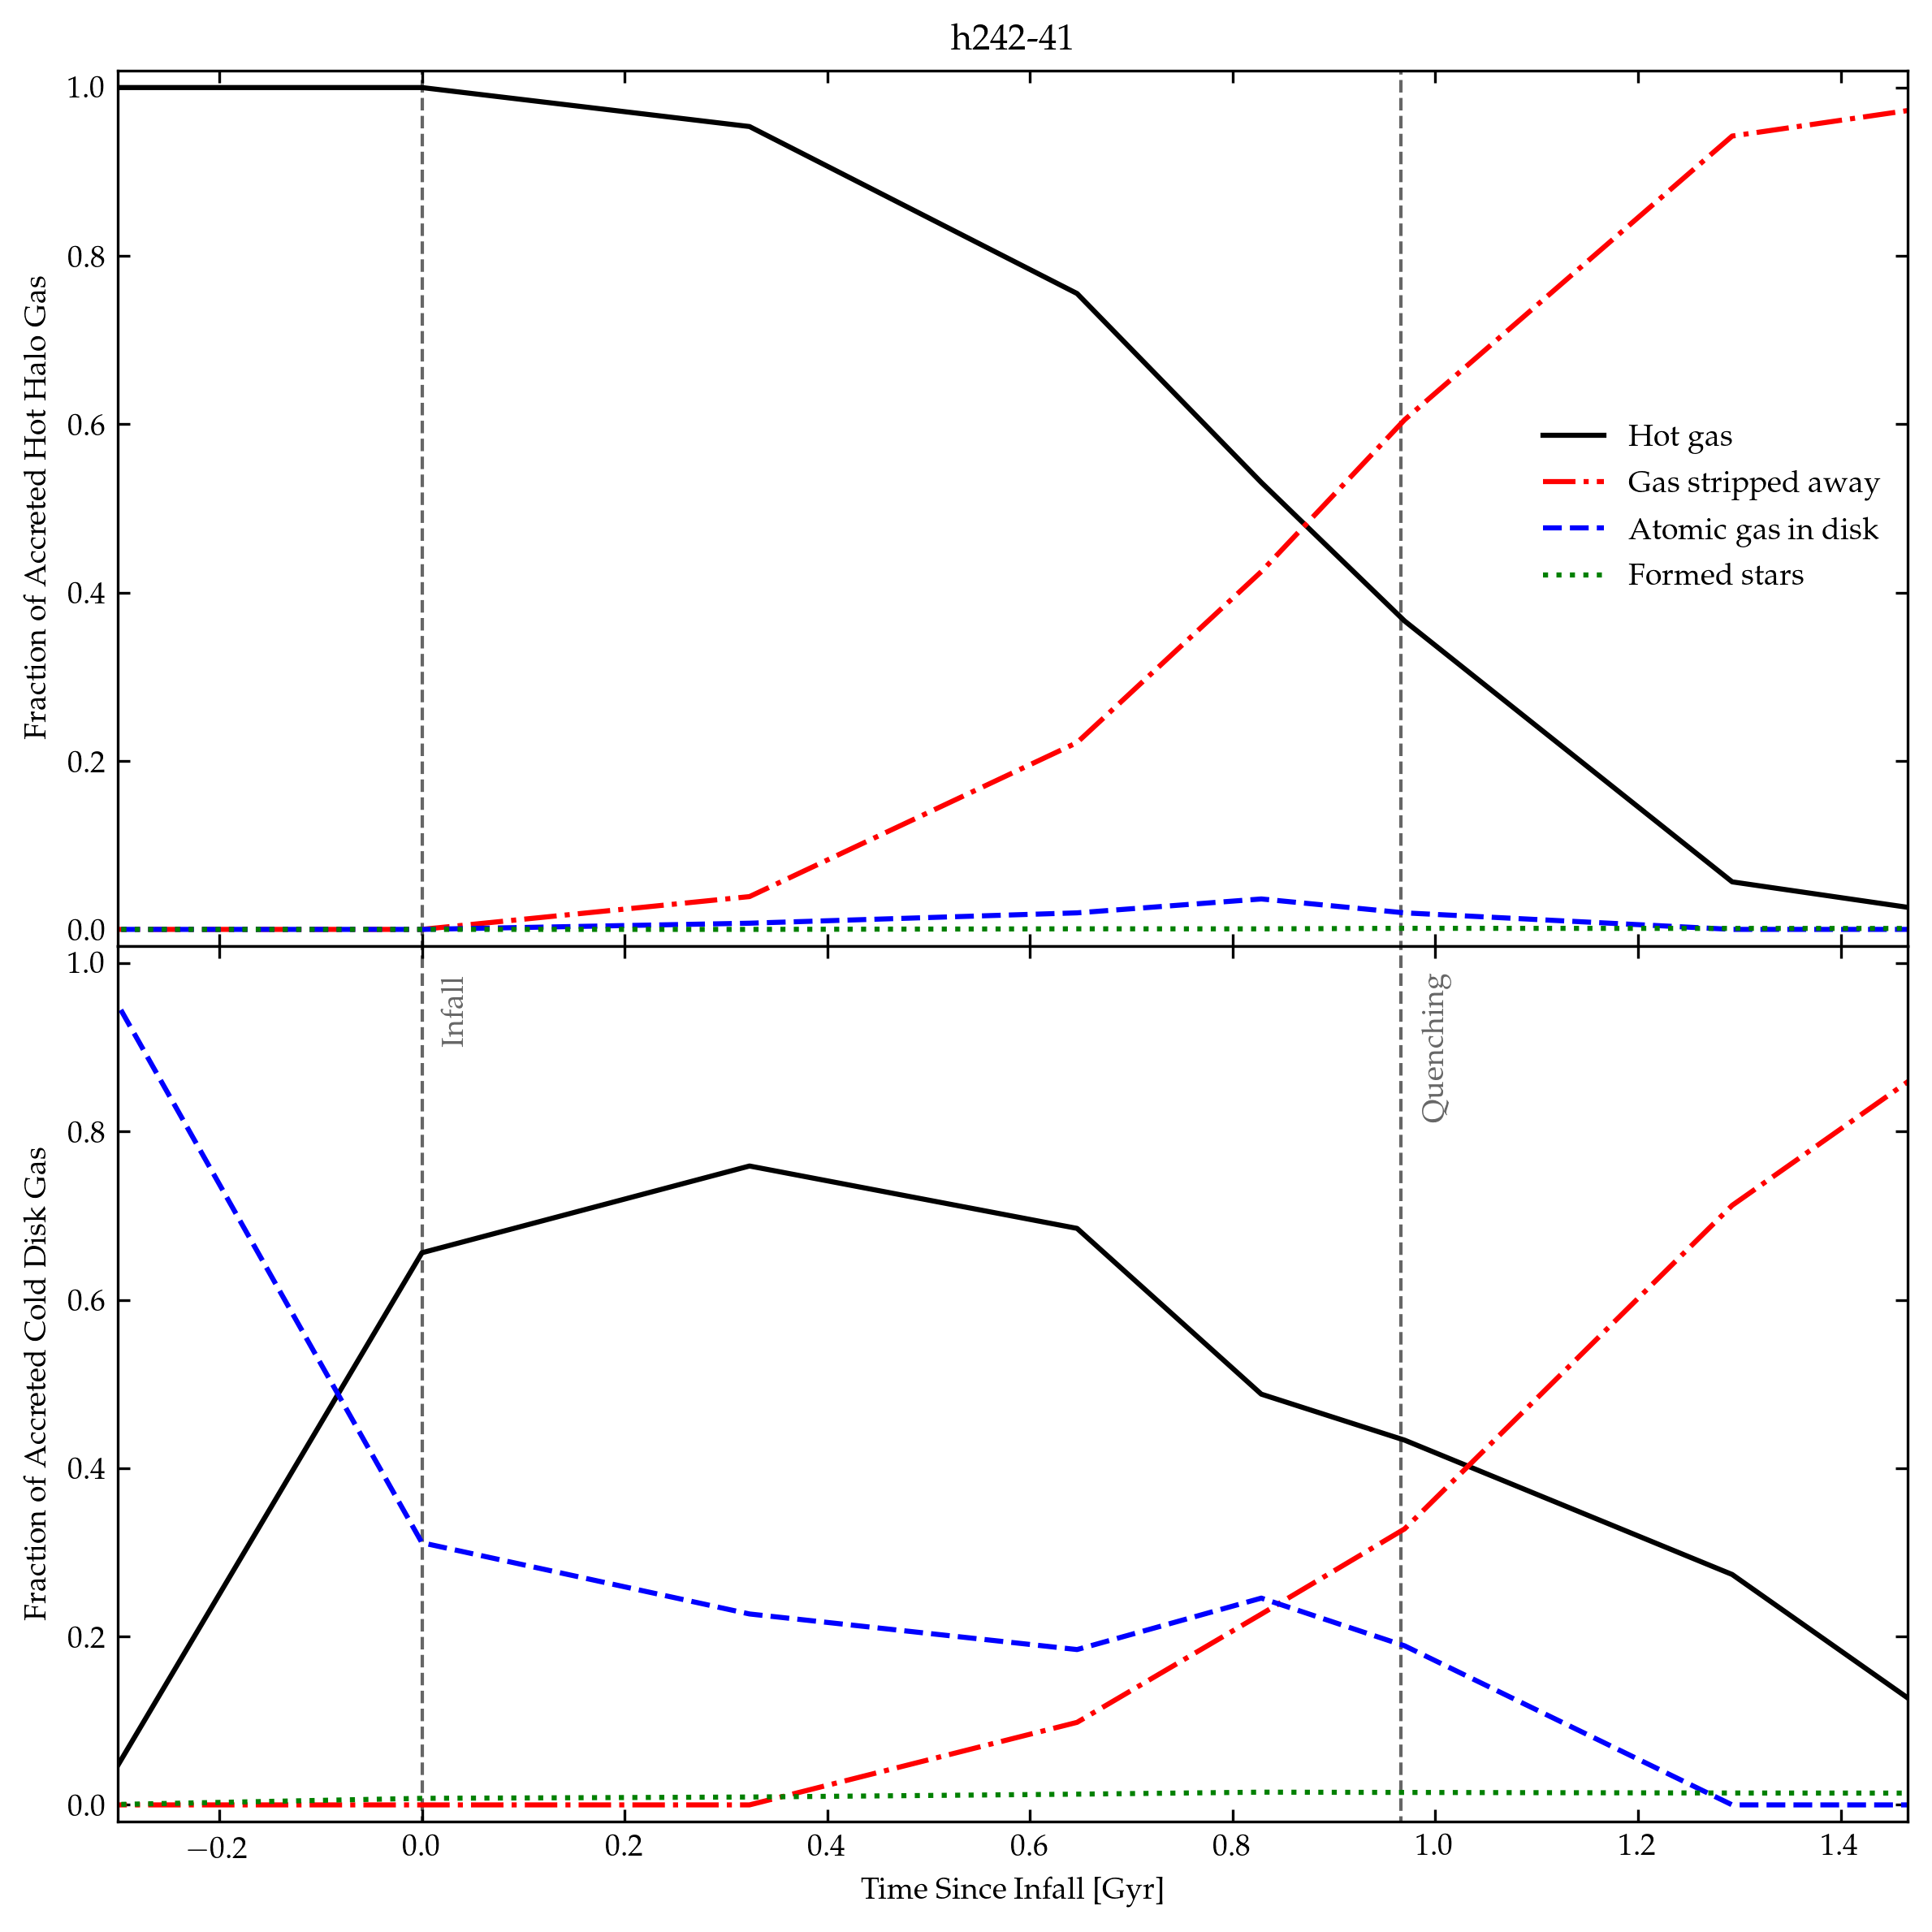

In [50]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h242', 41
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

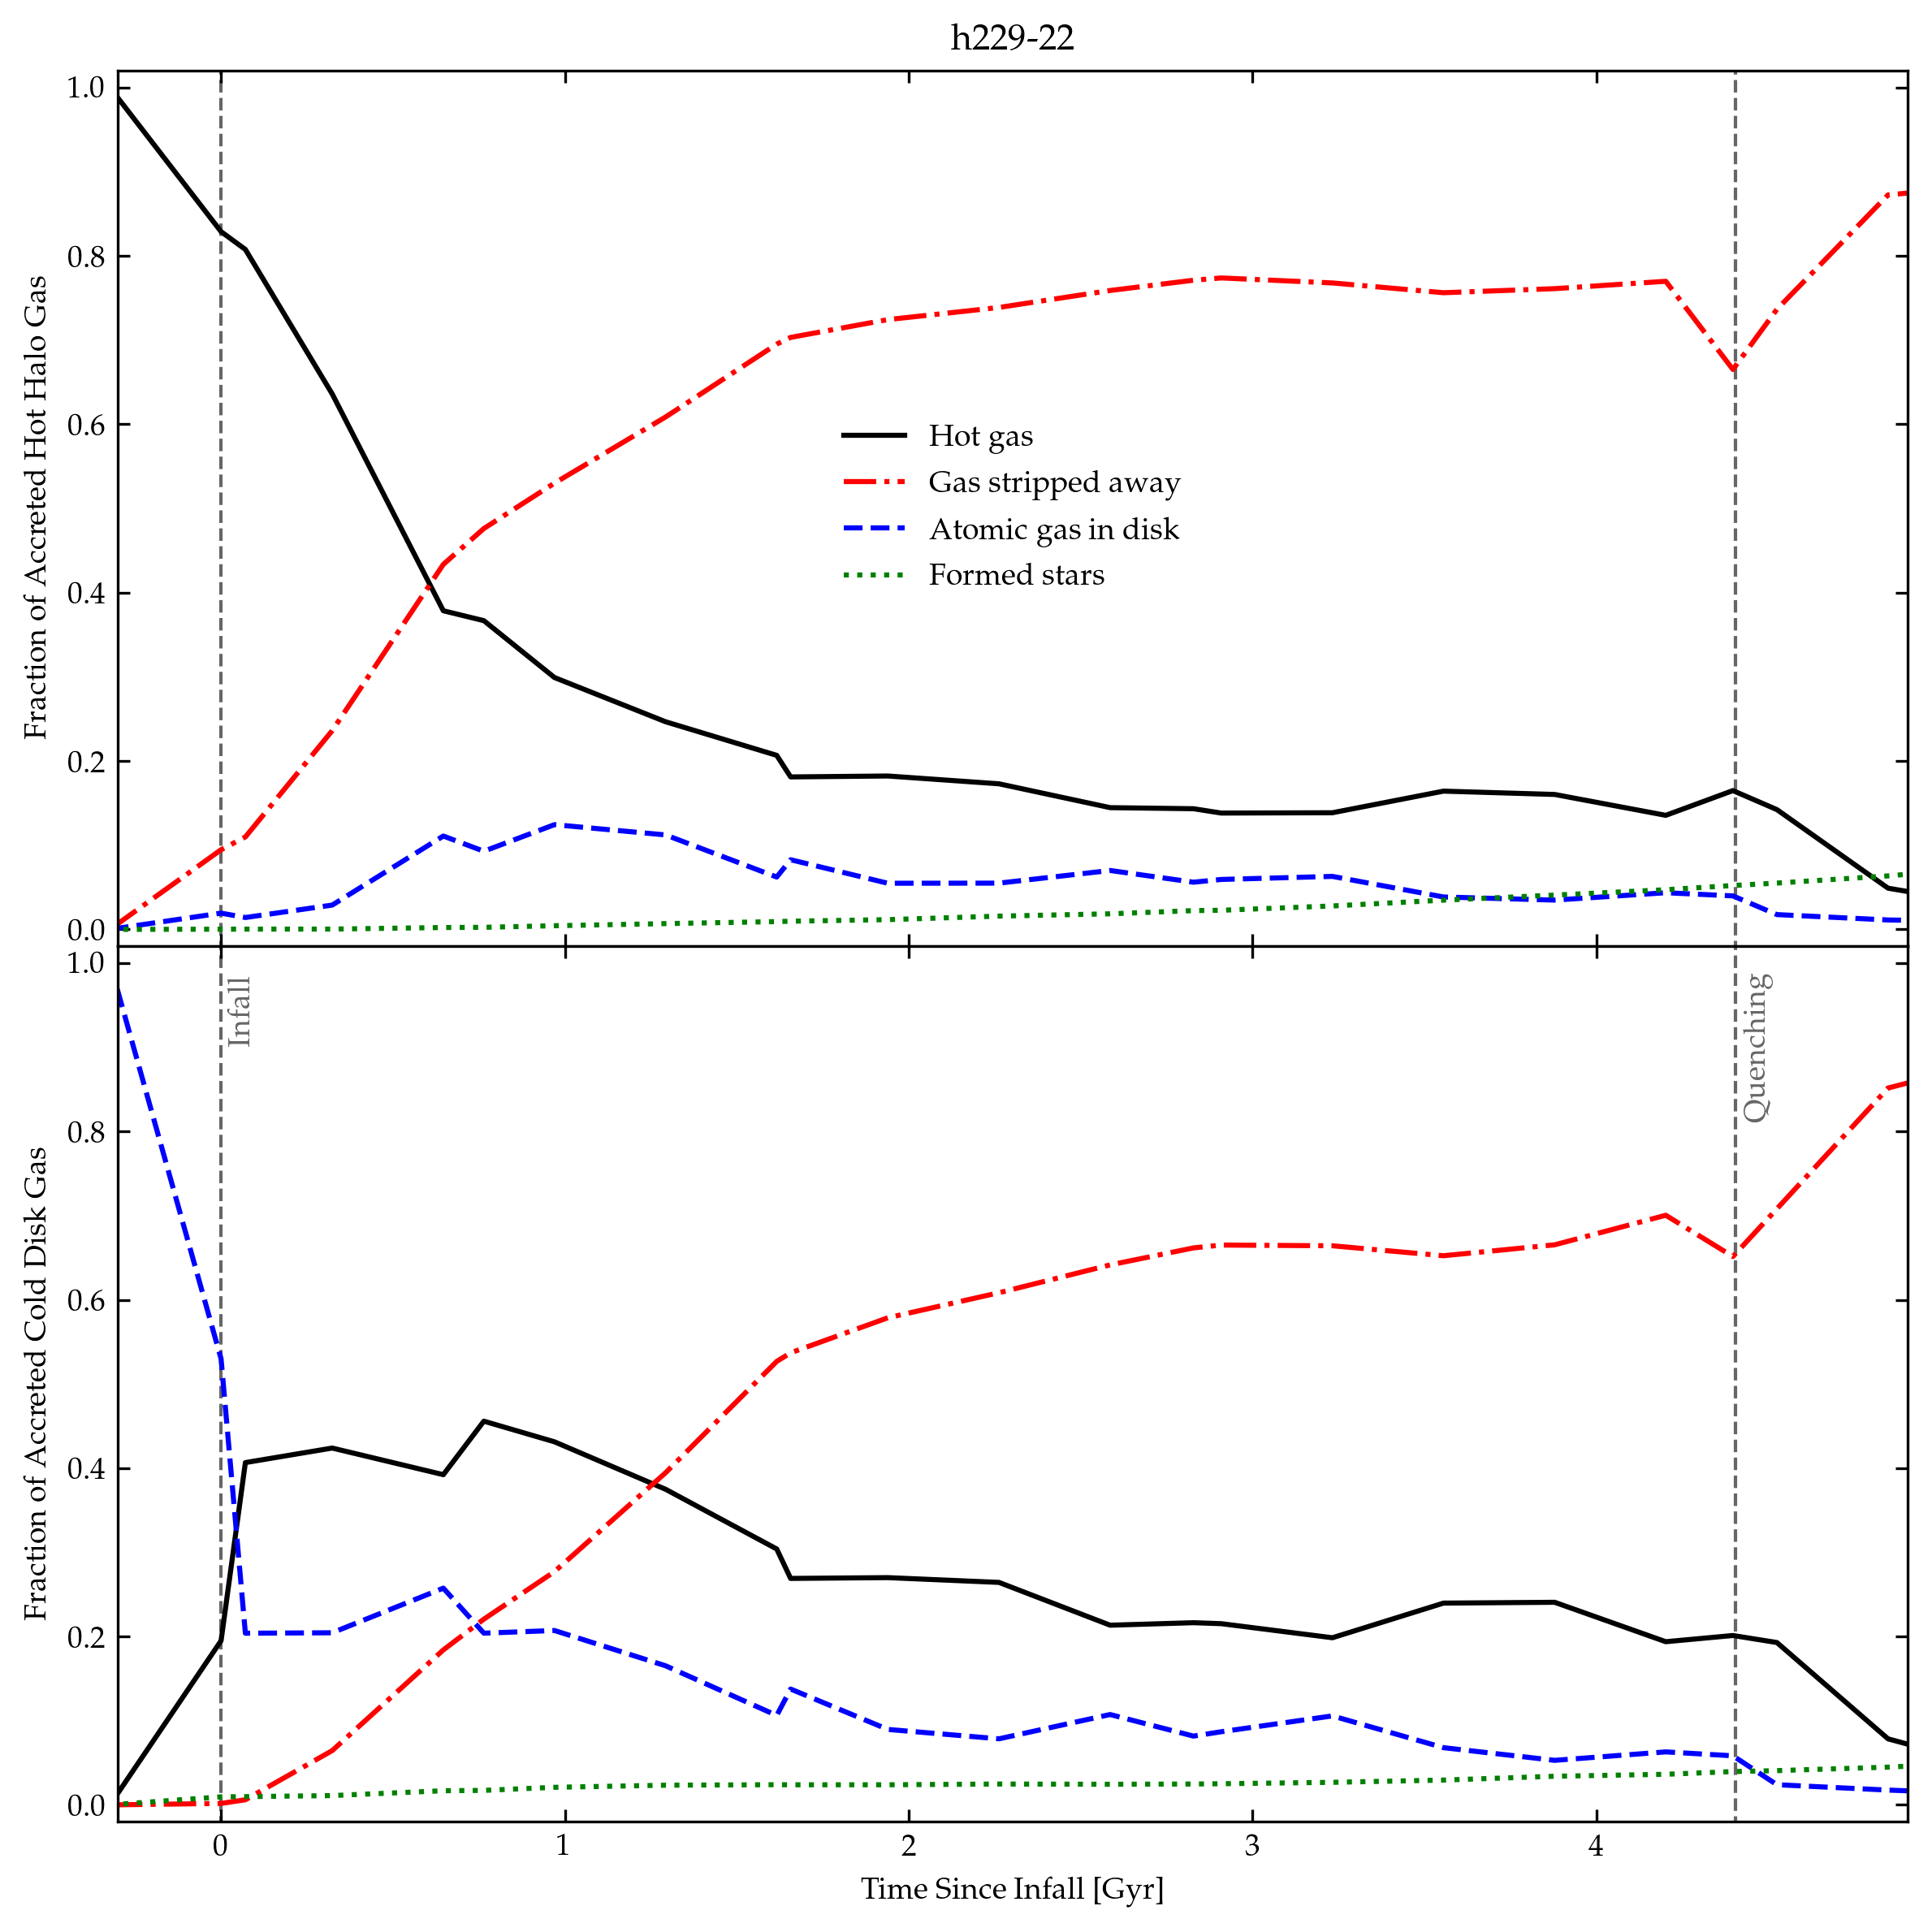

In [51]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 22
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

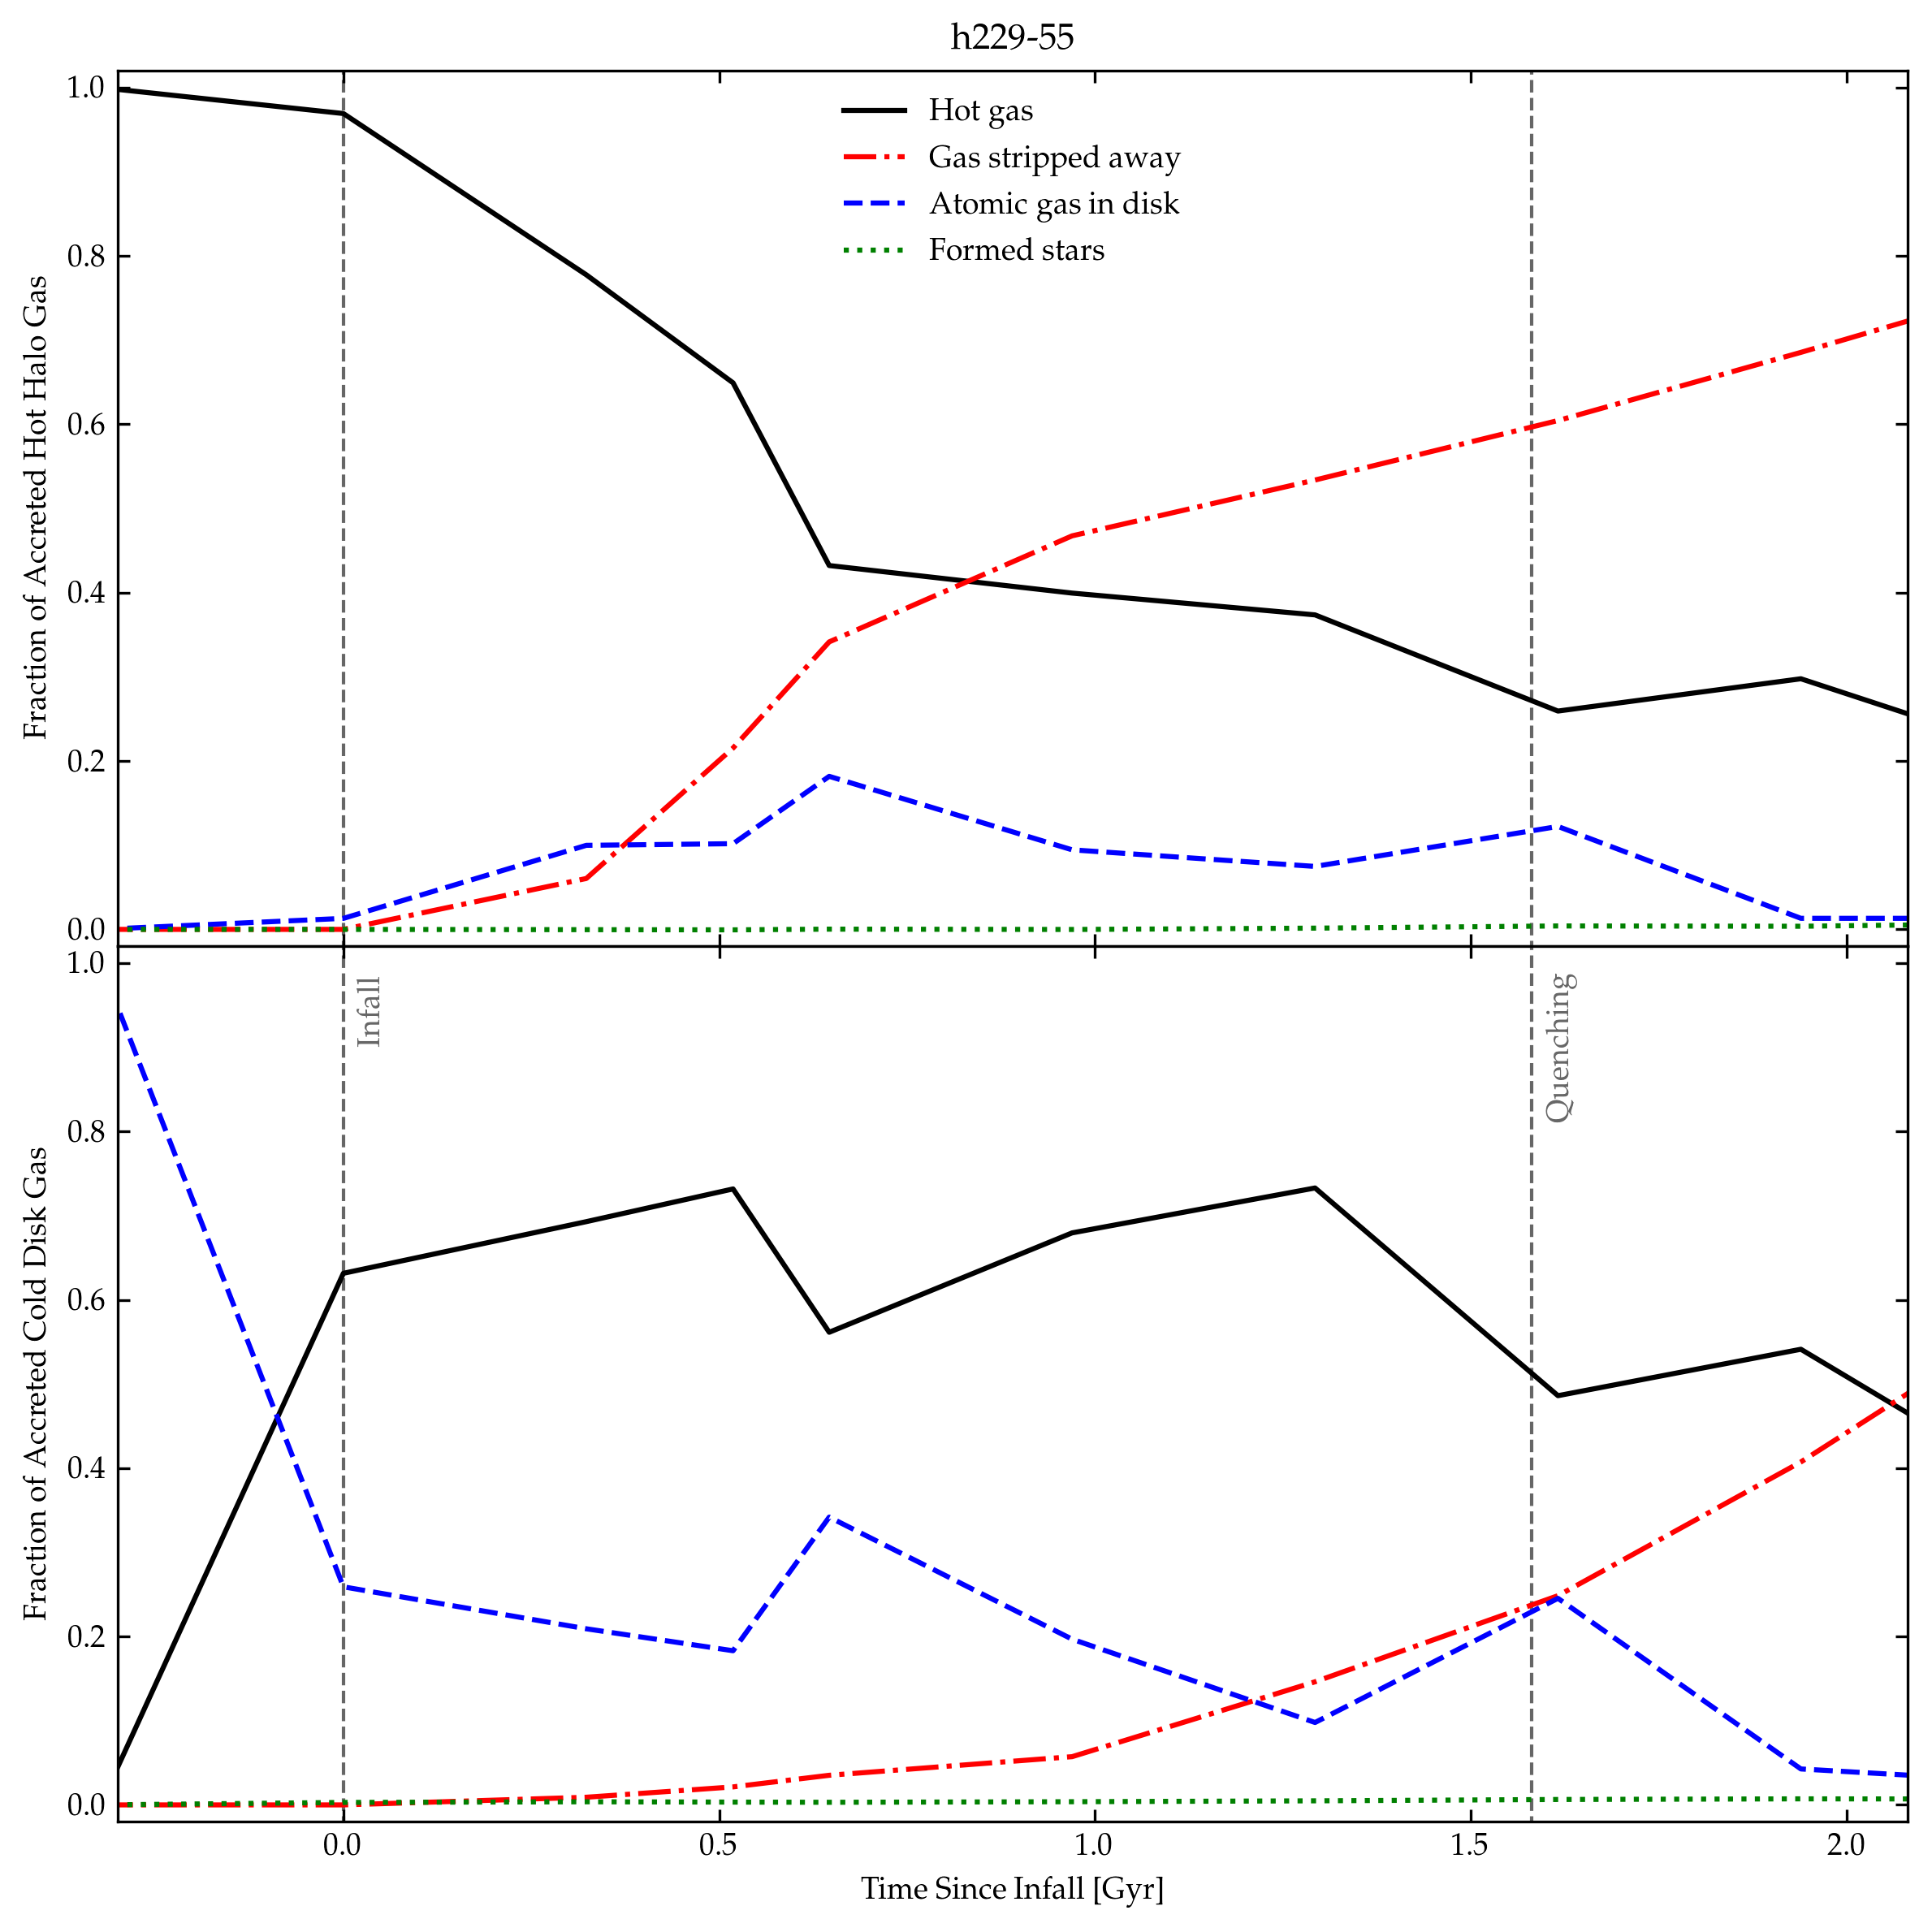

In [280]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 55
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

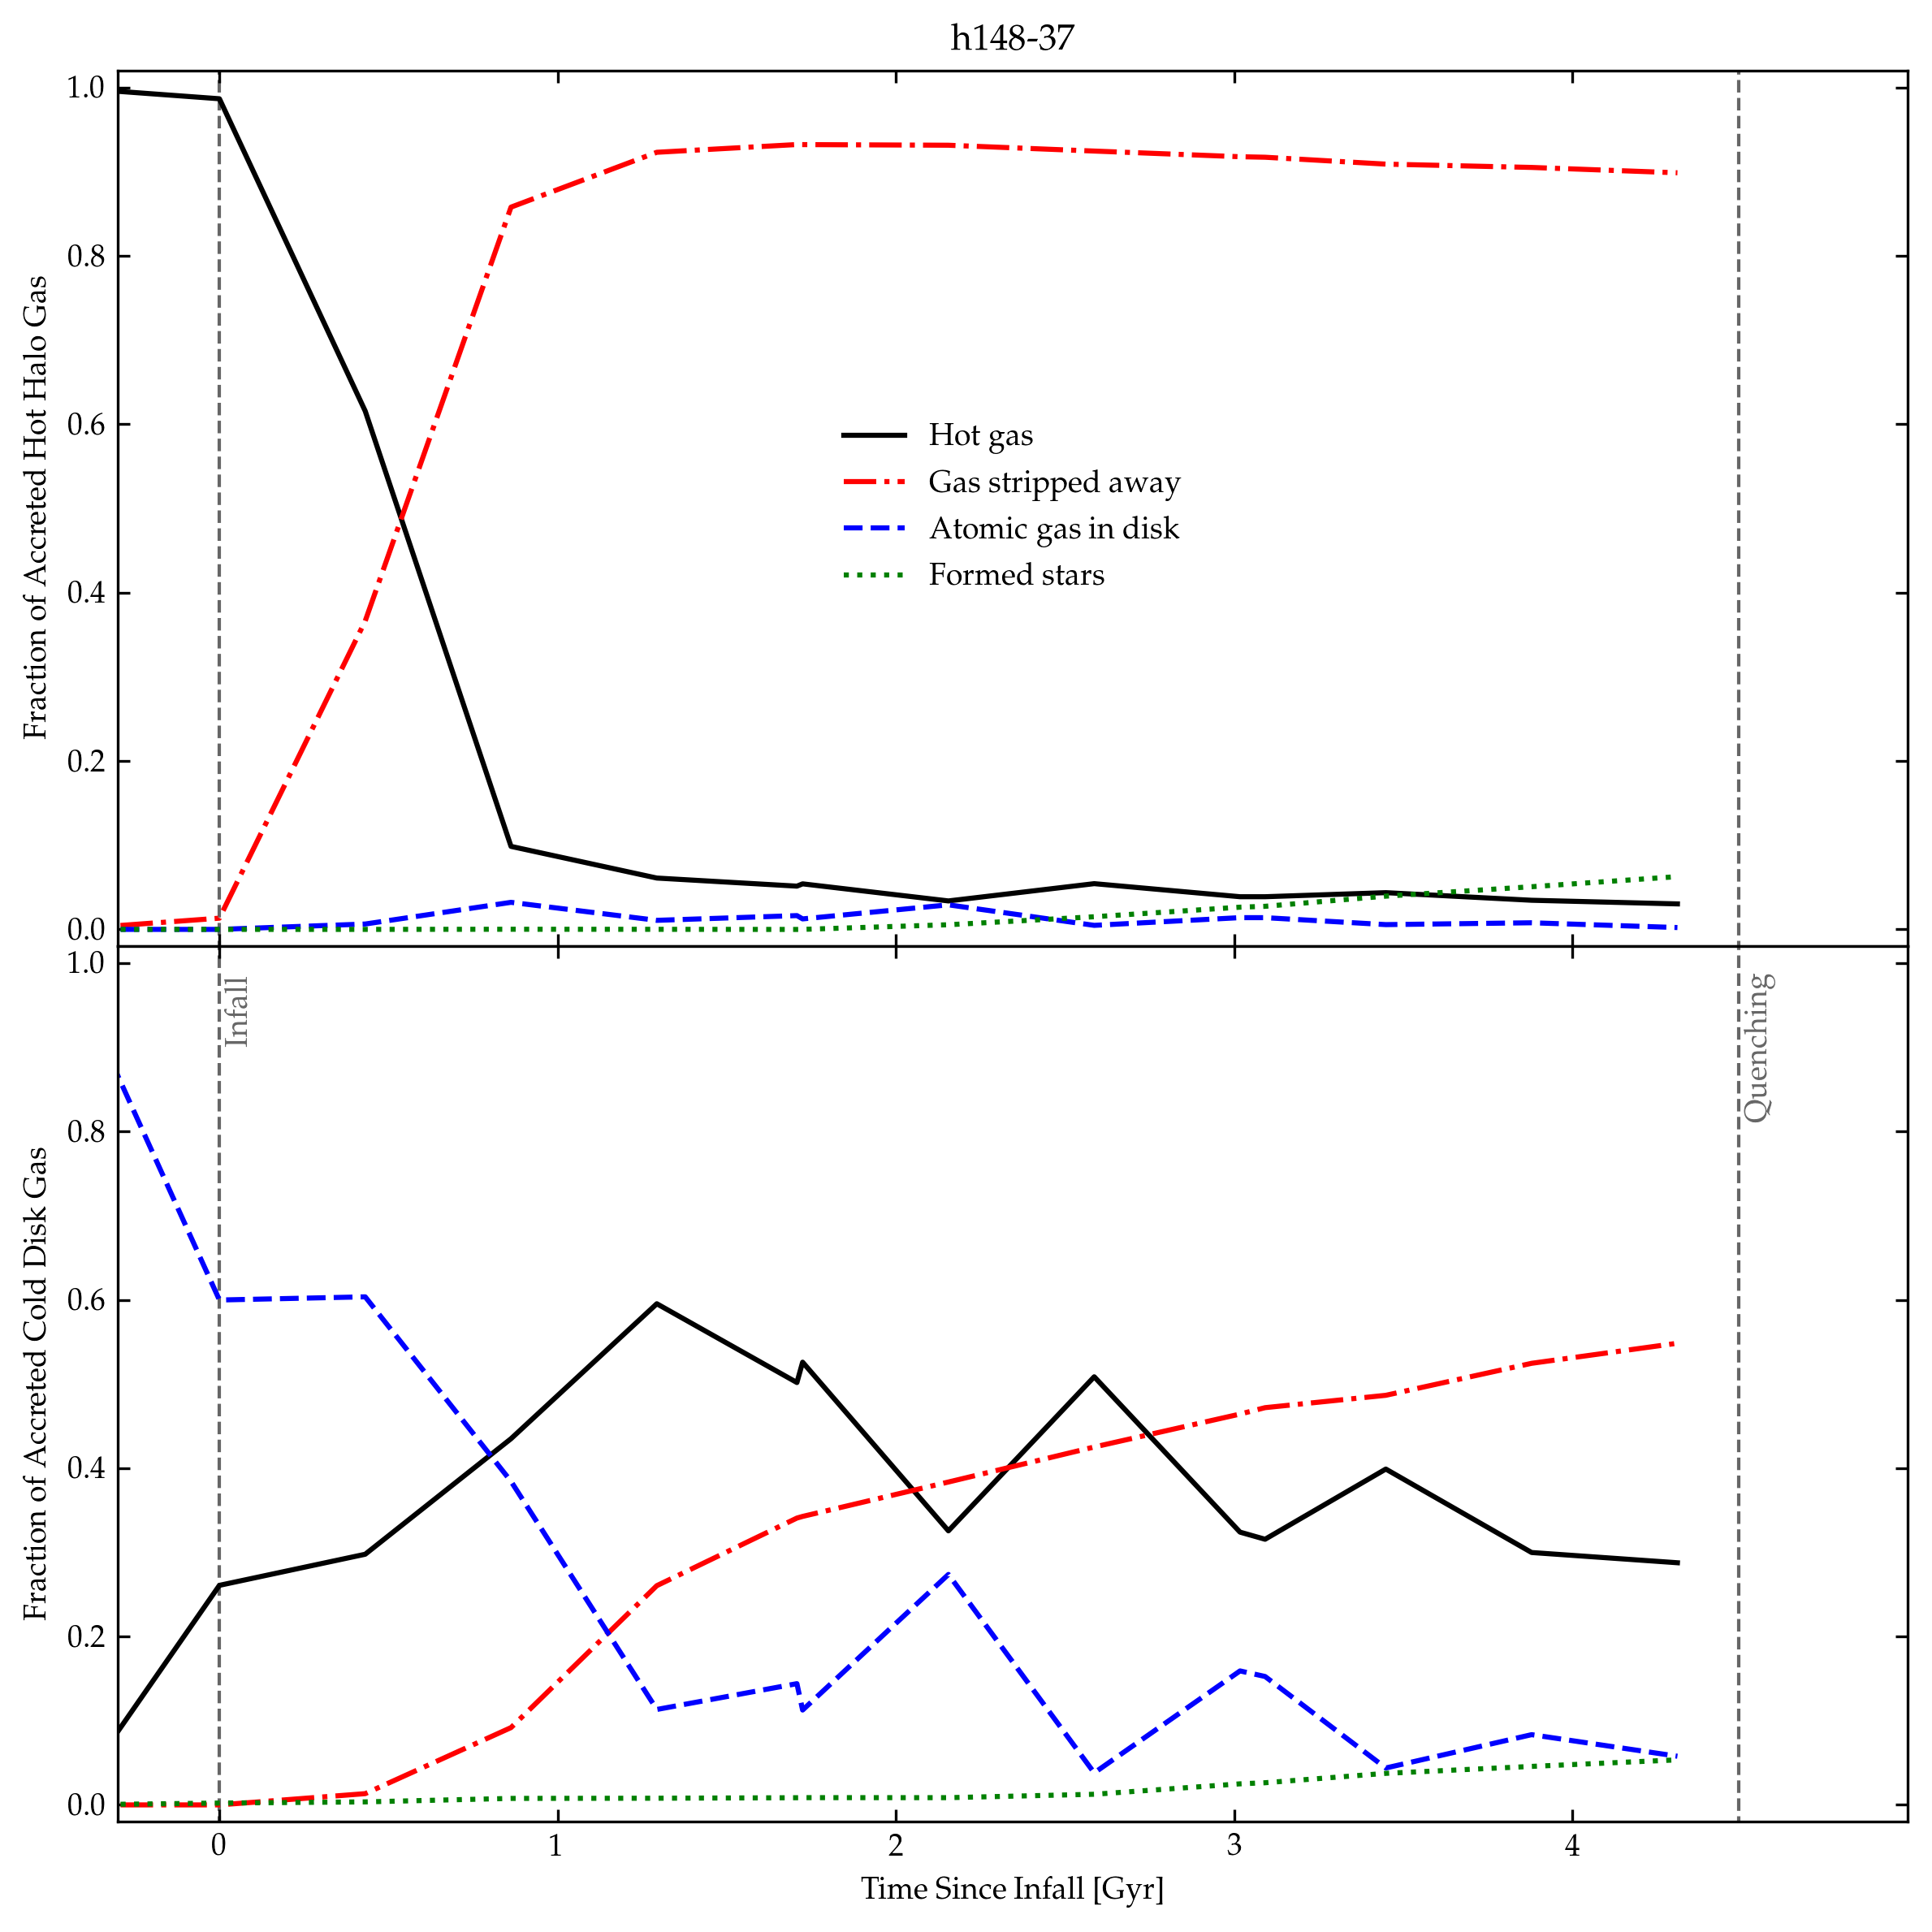

In [288]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h148', 37
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()x

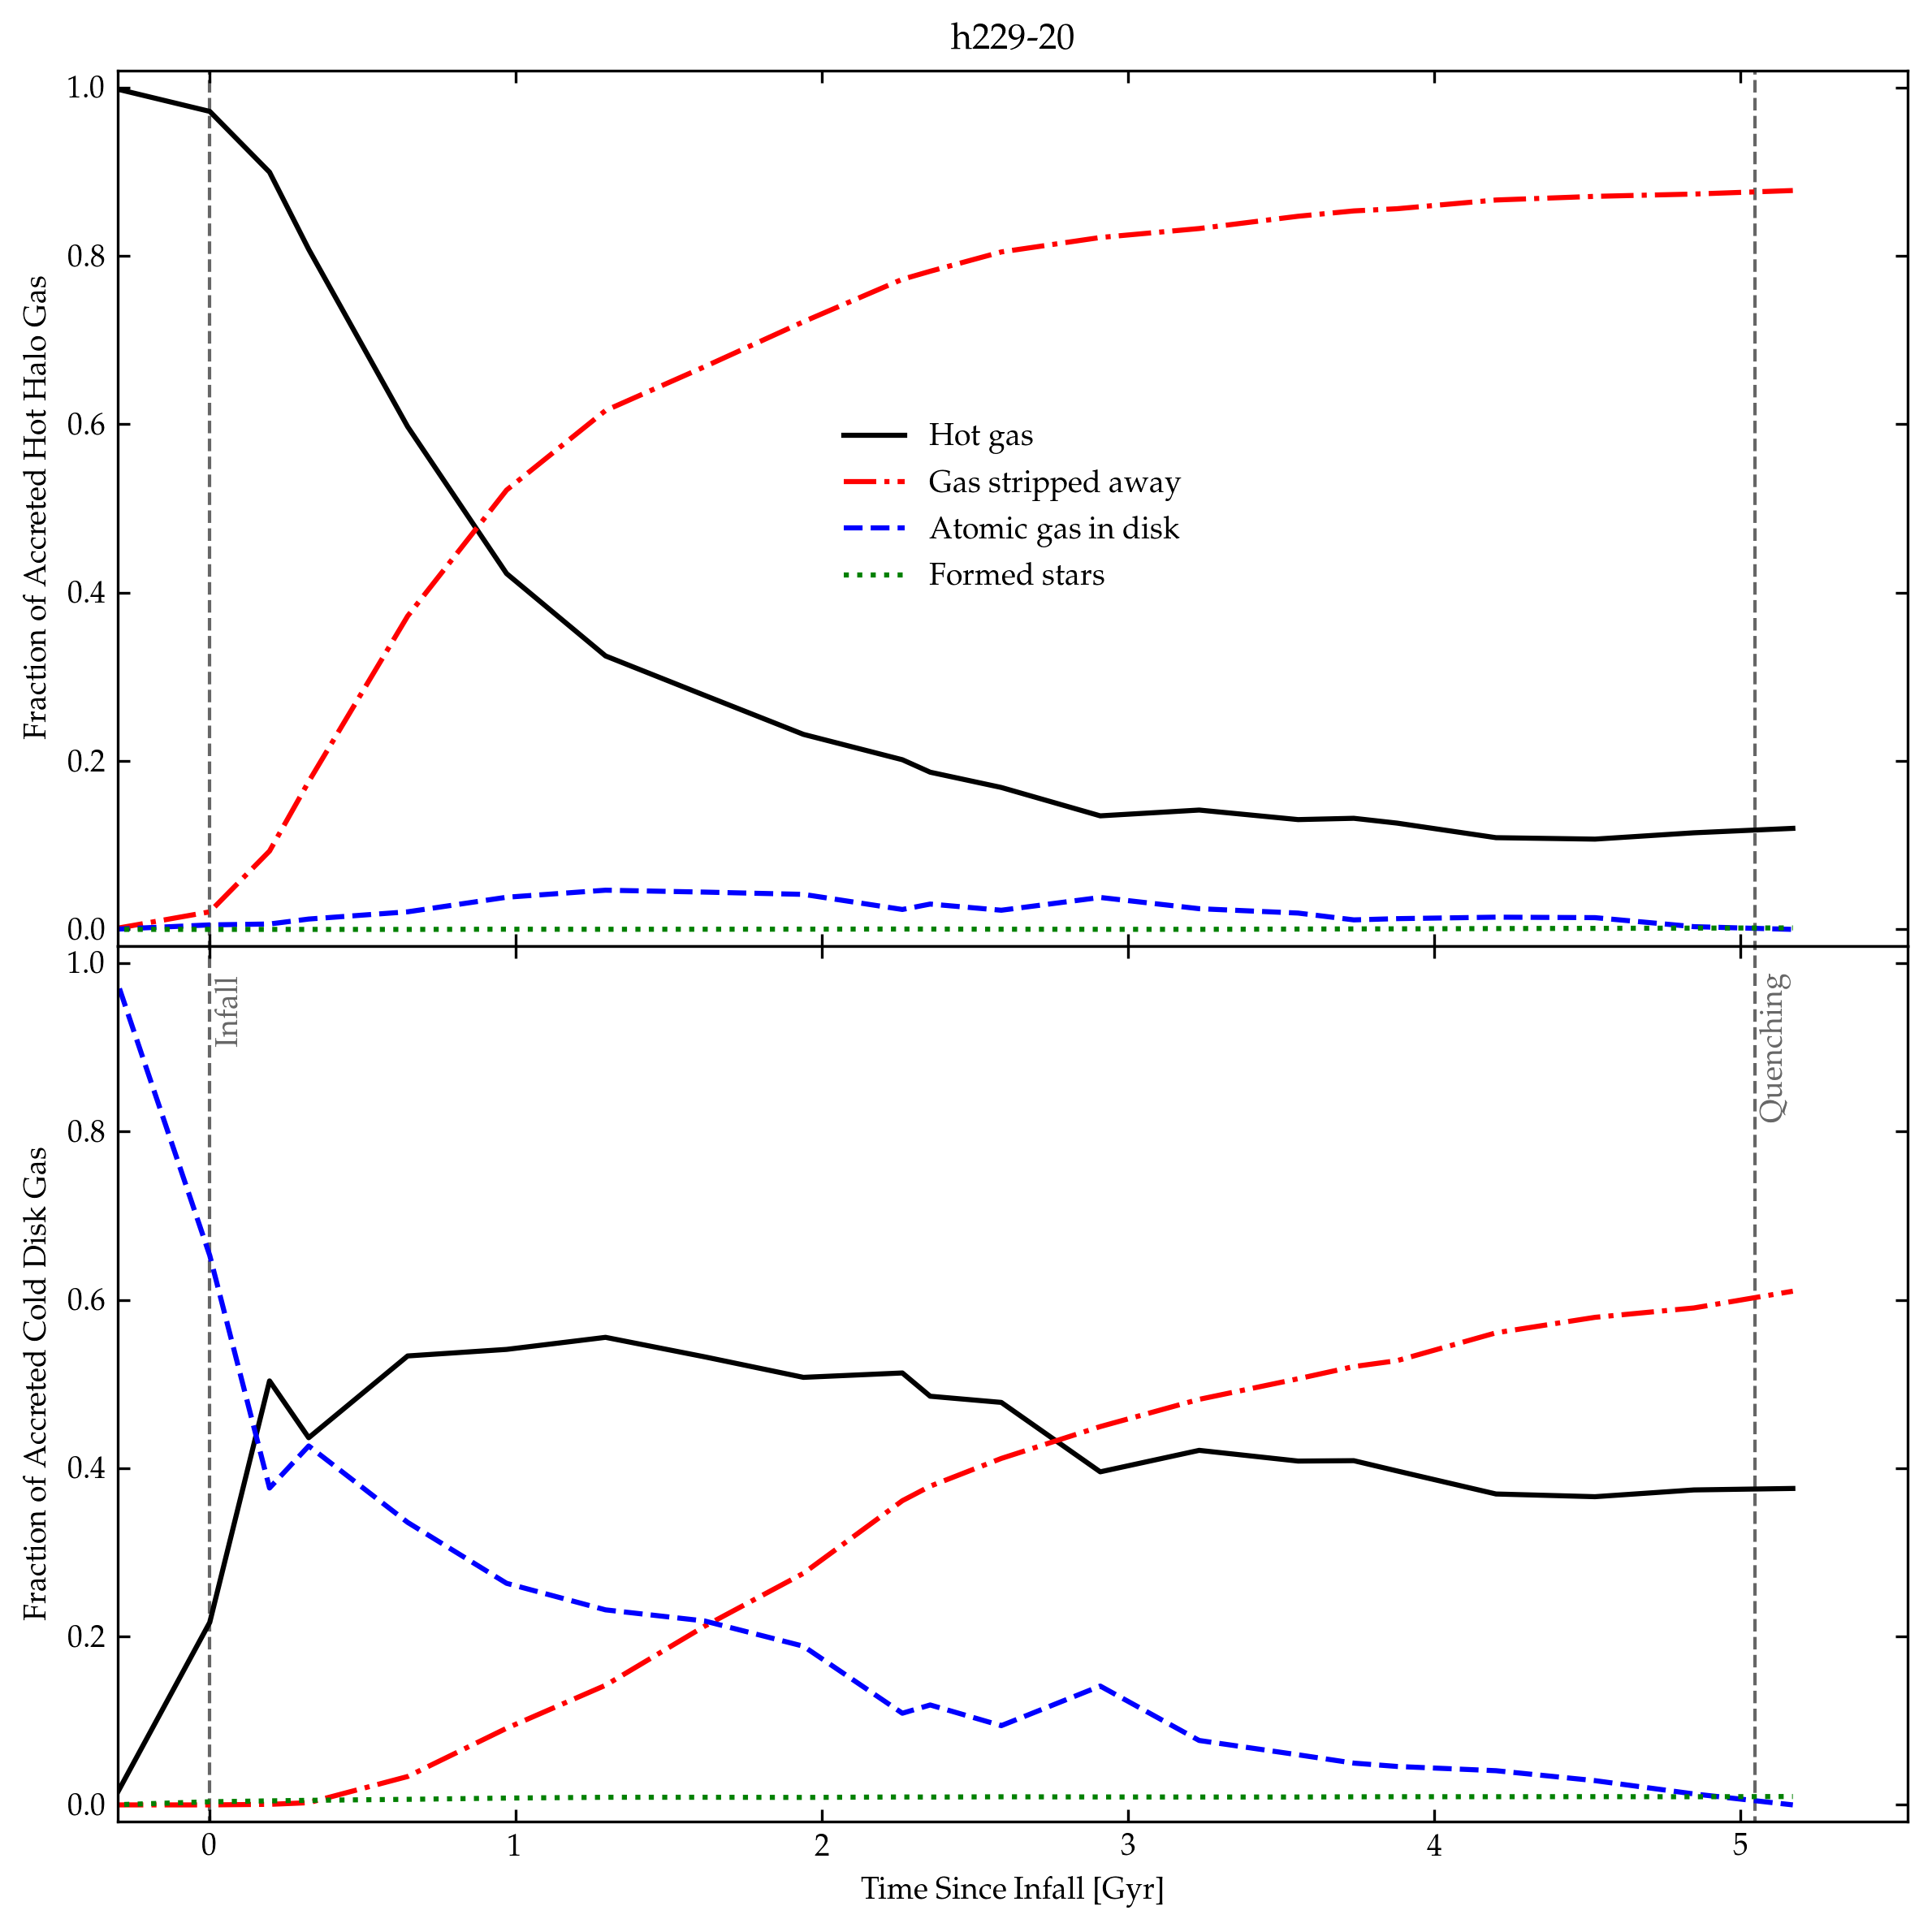

In [289]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 20
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

In [366]:
data = read_tracking_data('HotGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

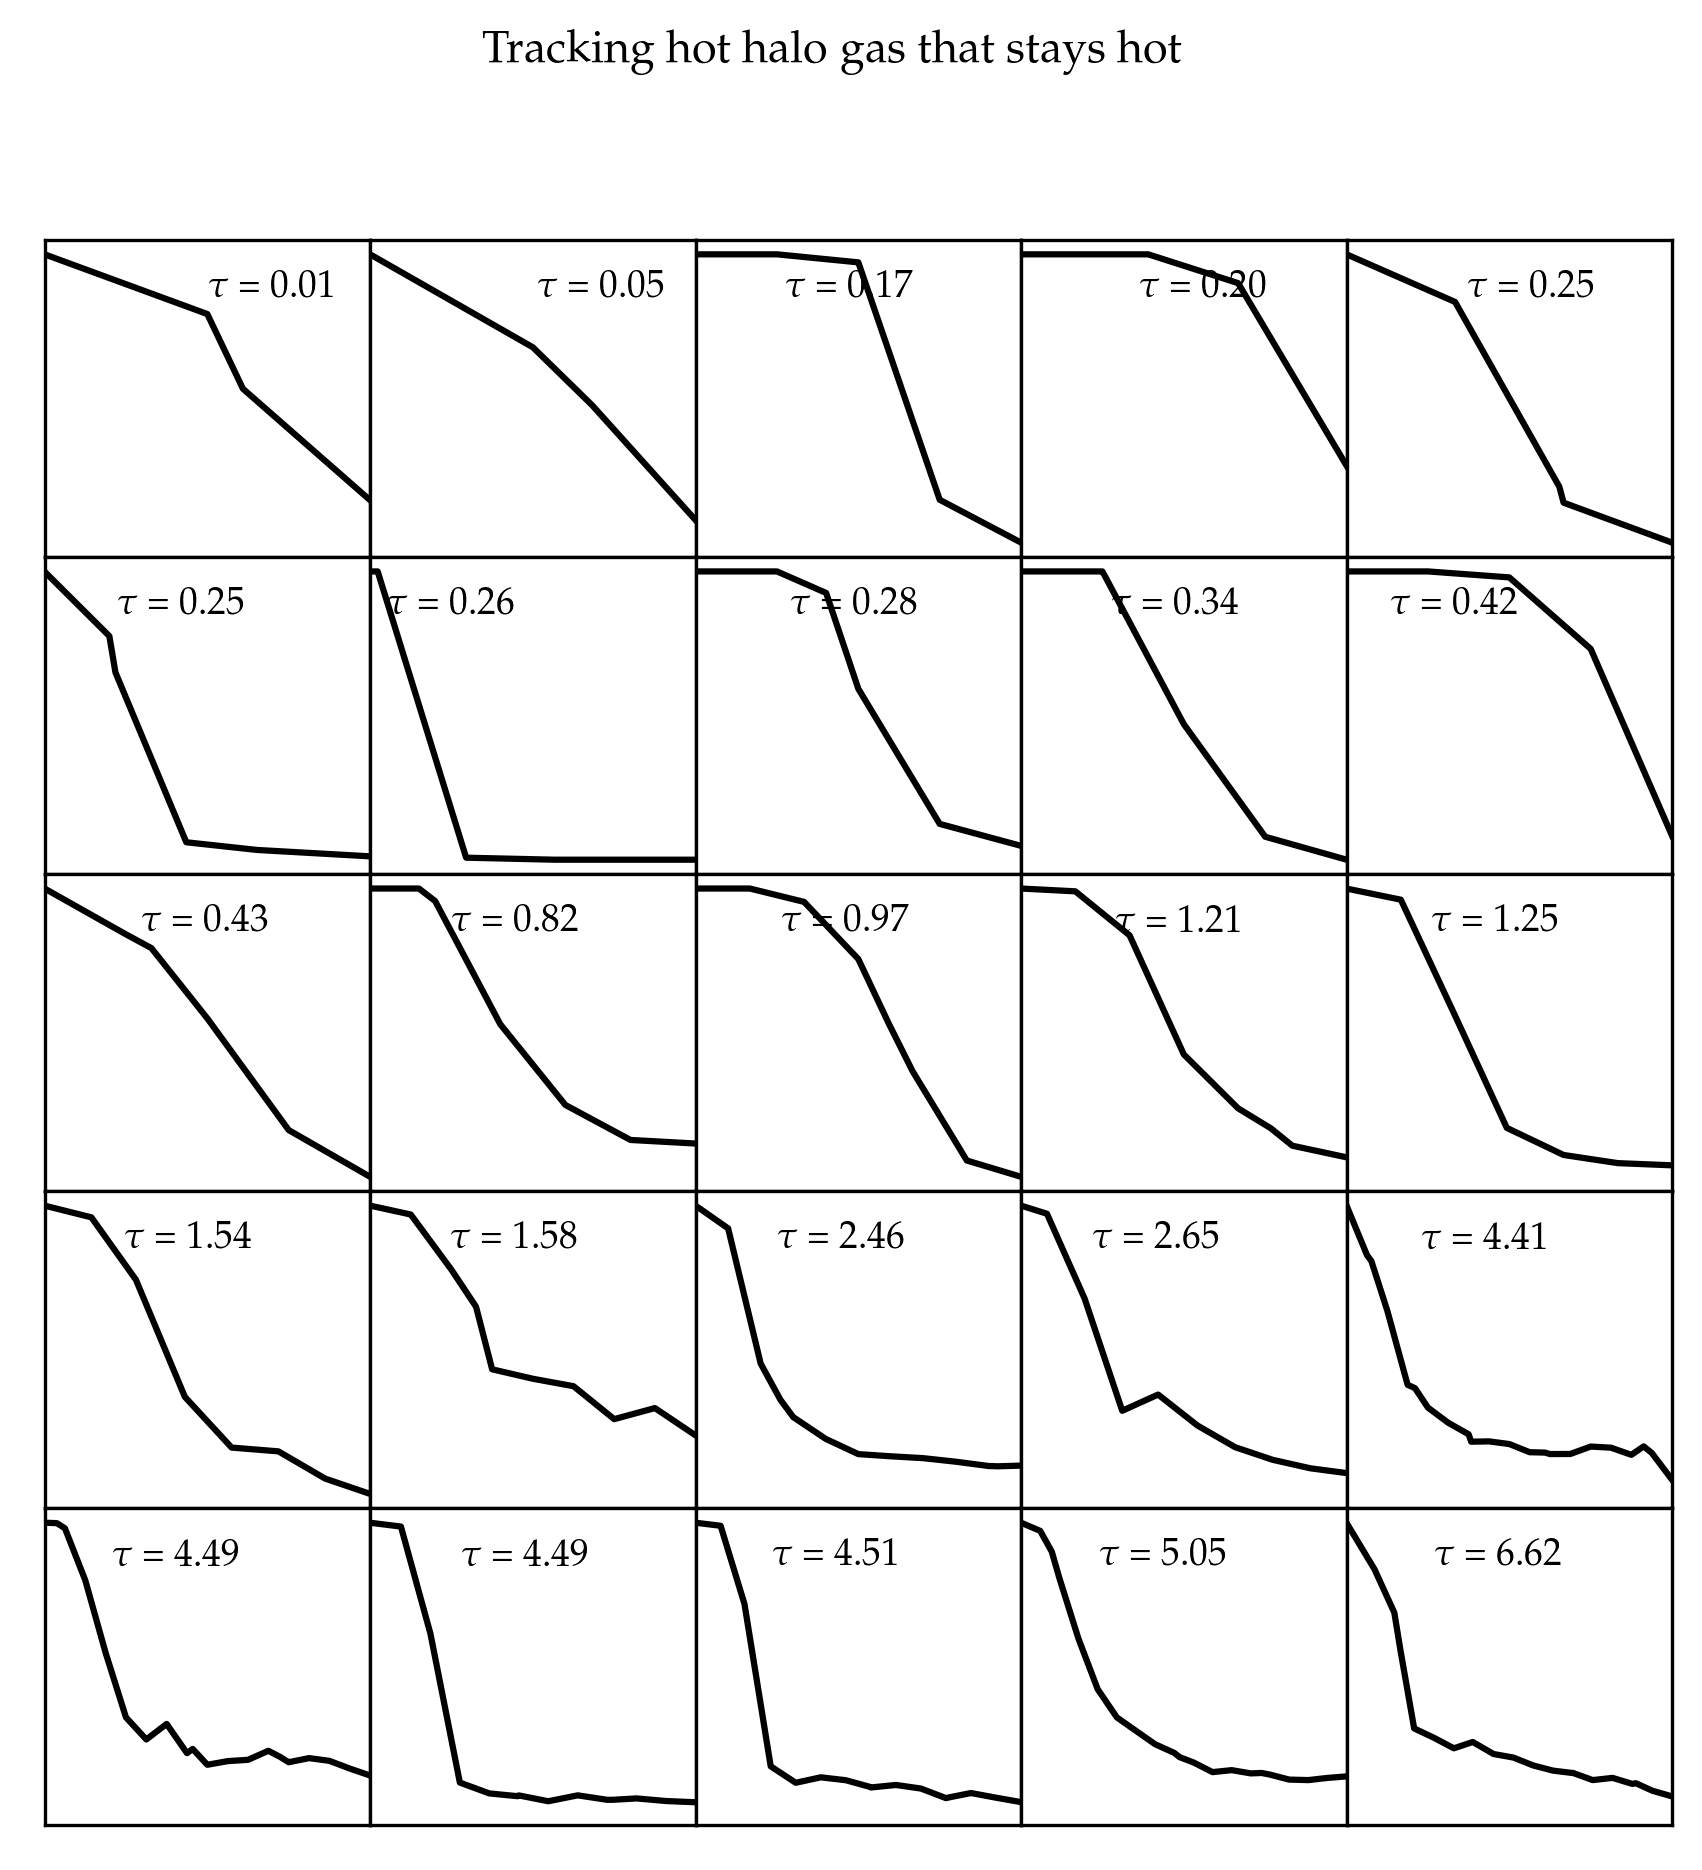

In [367]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_hot, 'k-')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking hot halo gas that stays hot')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

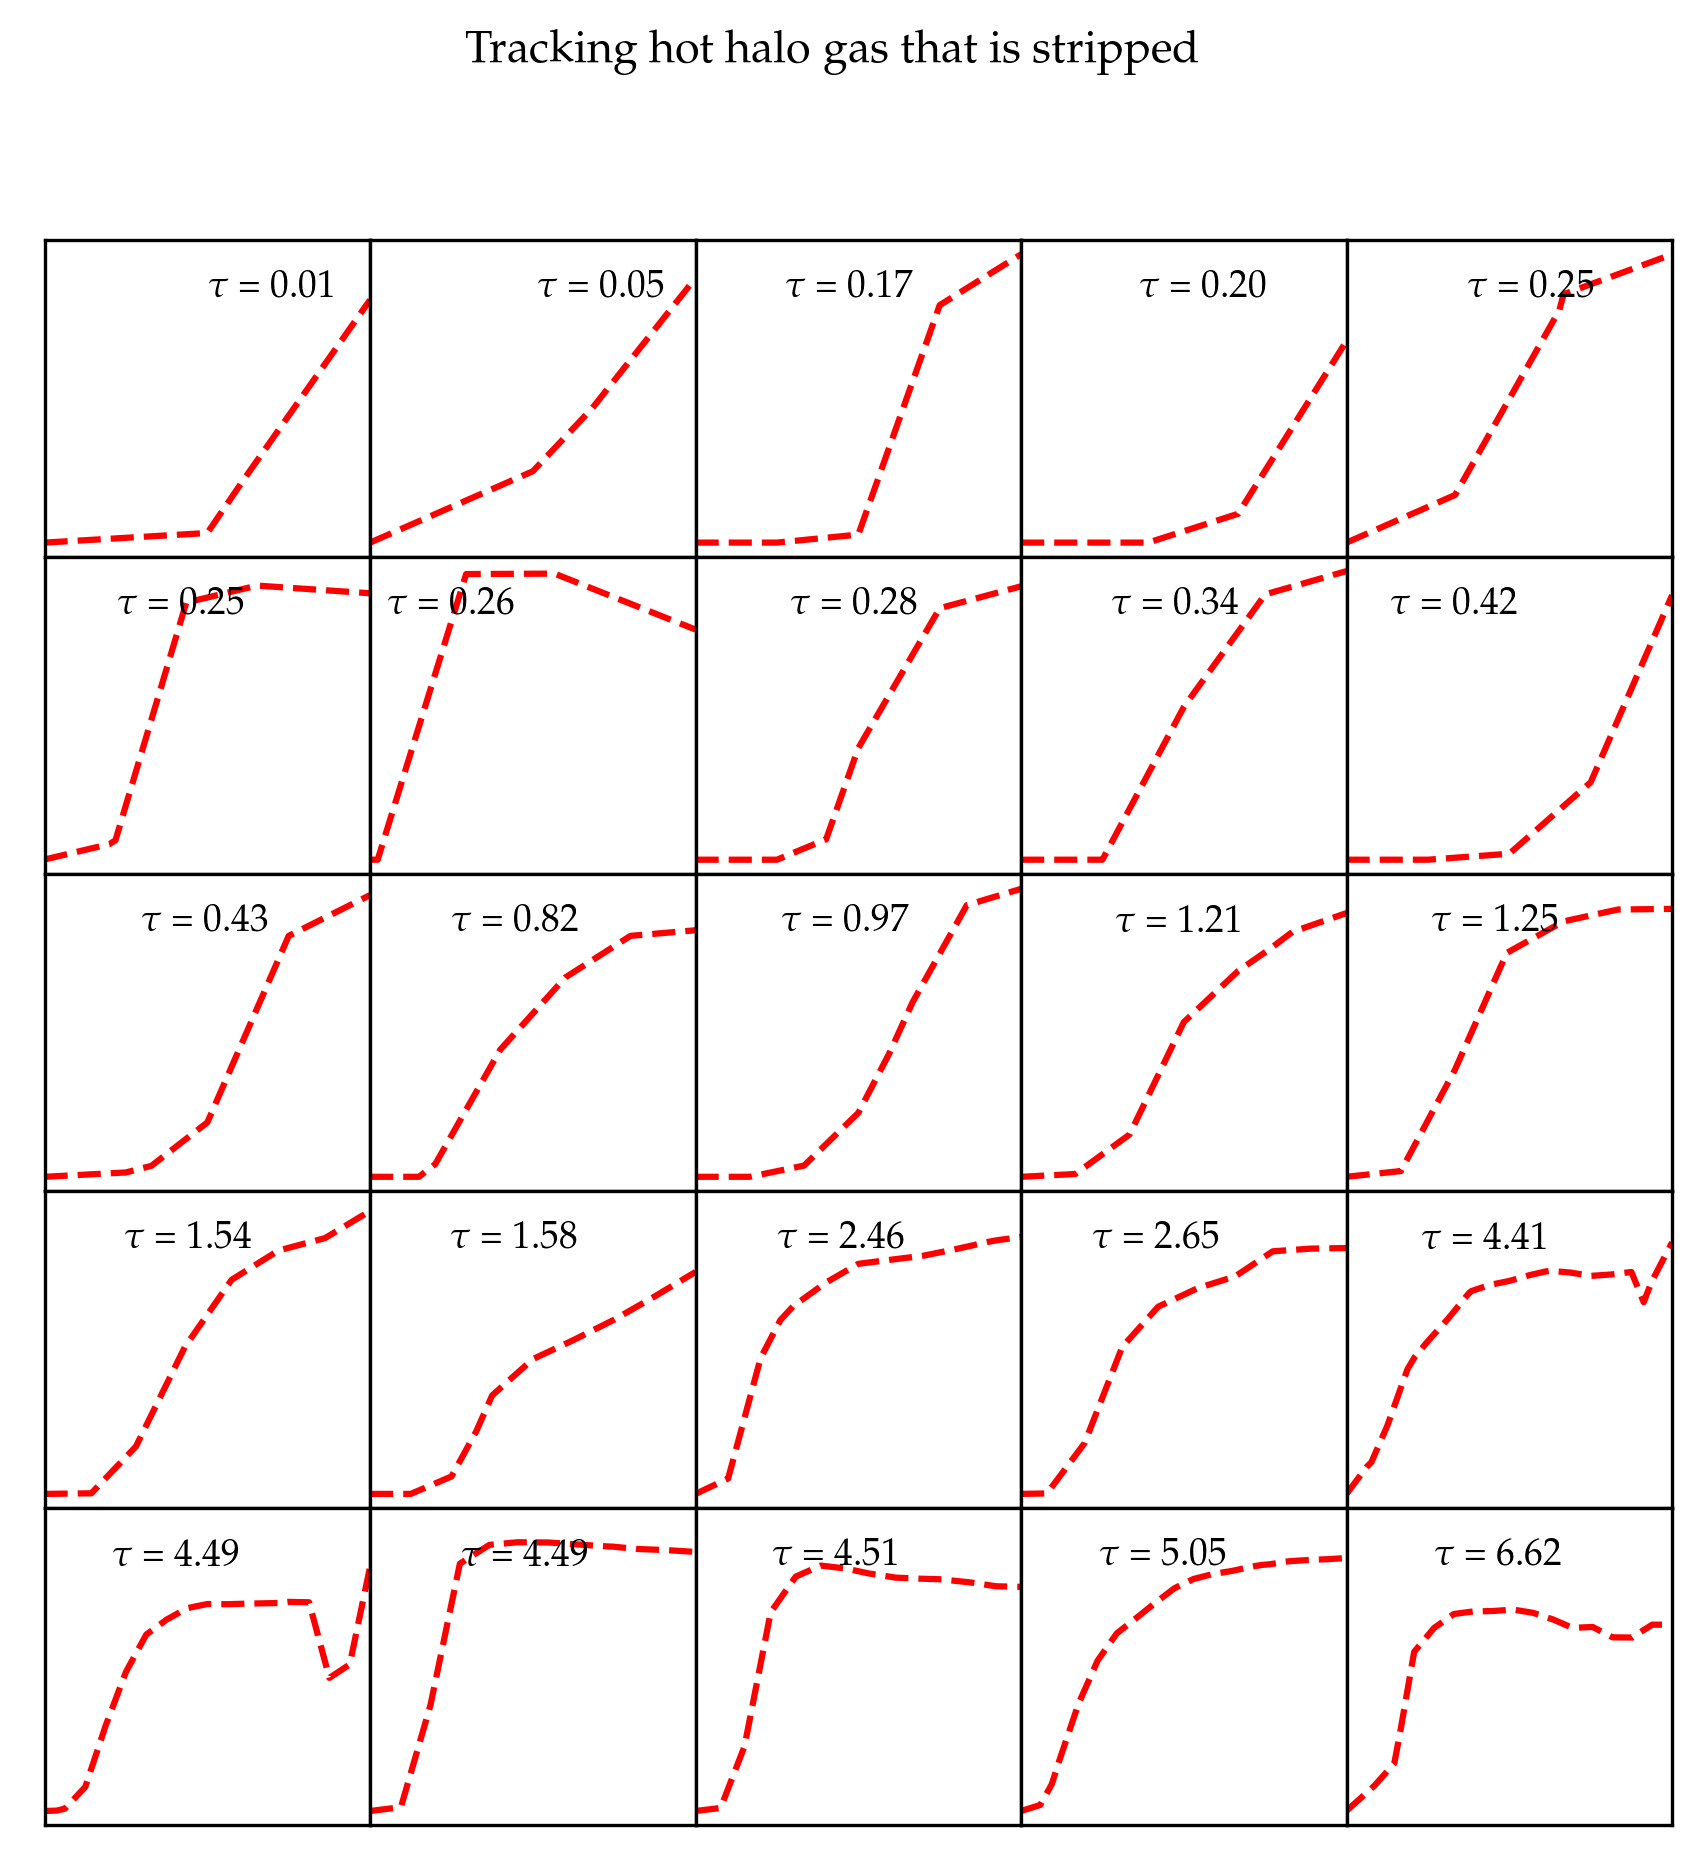

In [368]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking hot halo gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [369]:
data = read_tracking_data('ColdGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

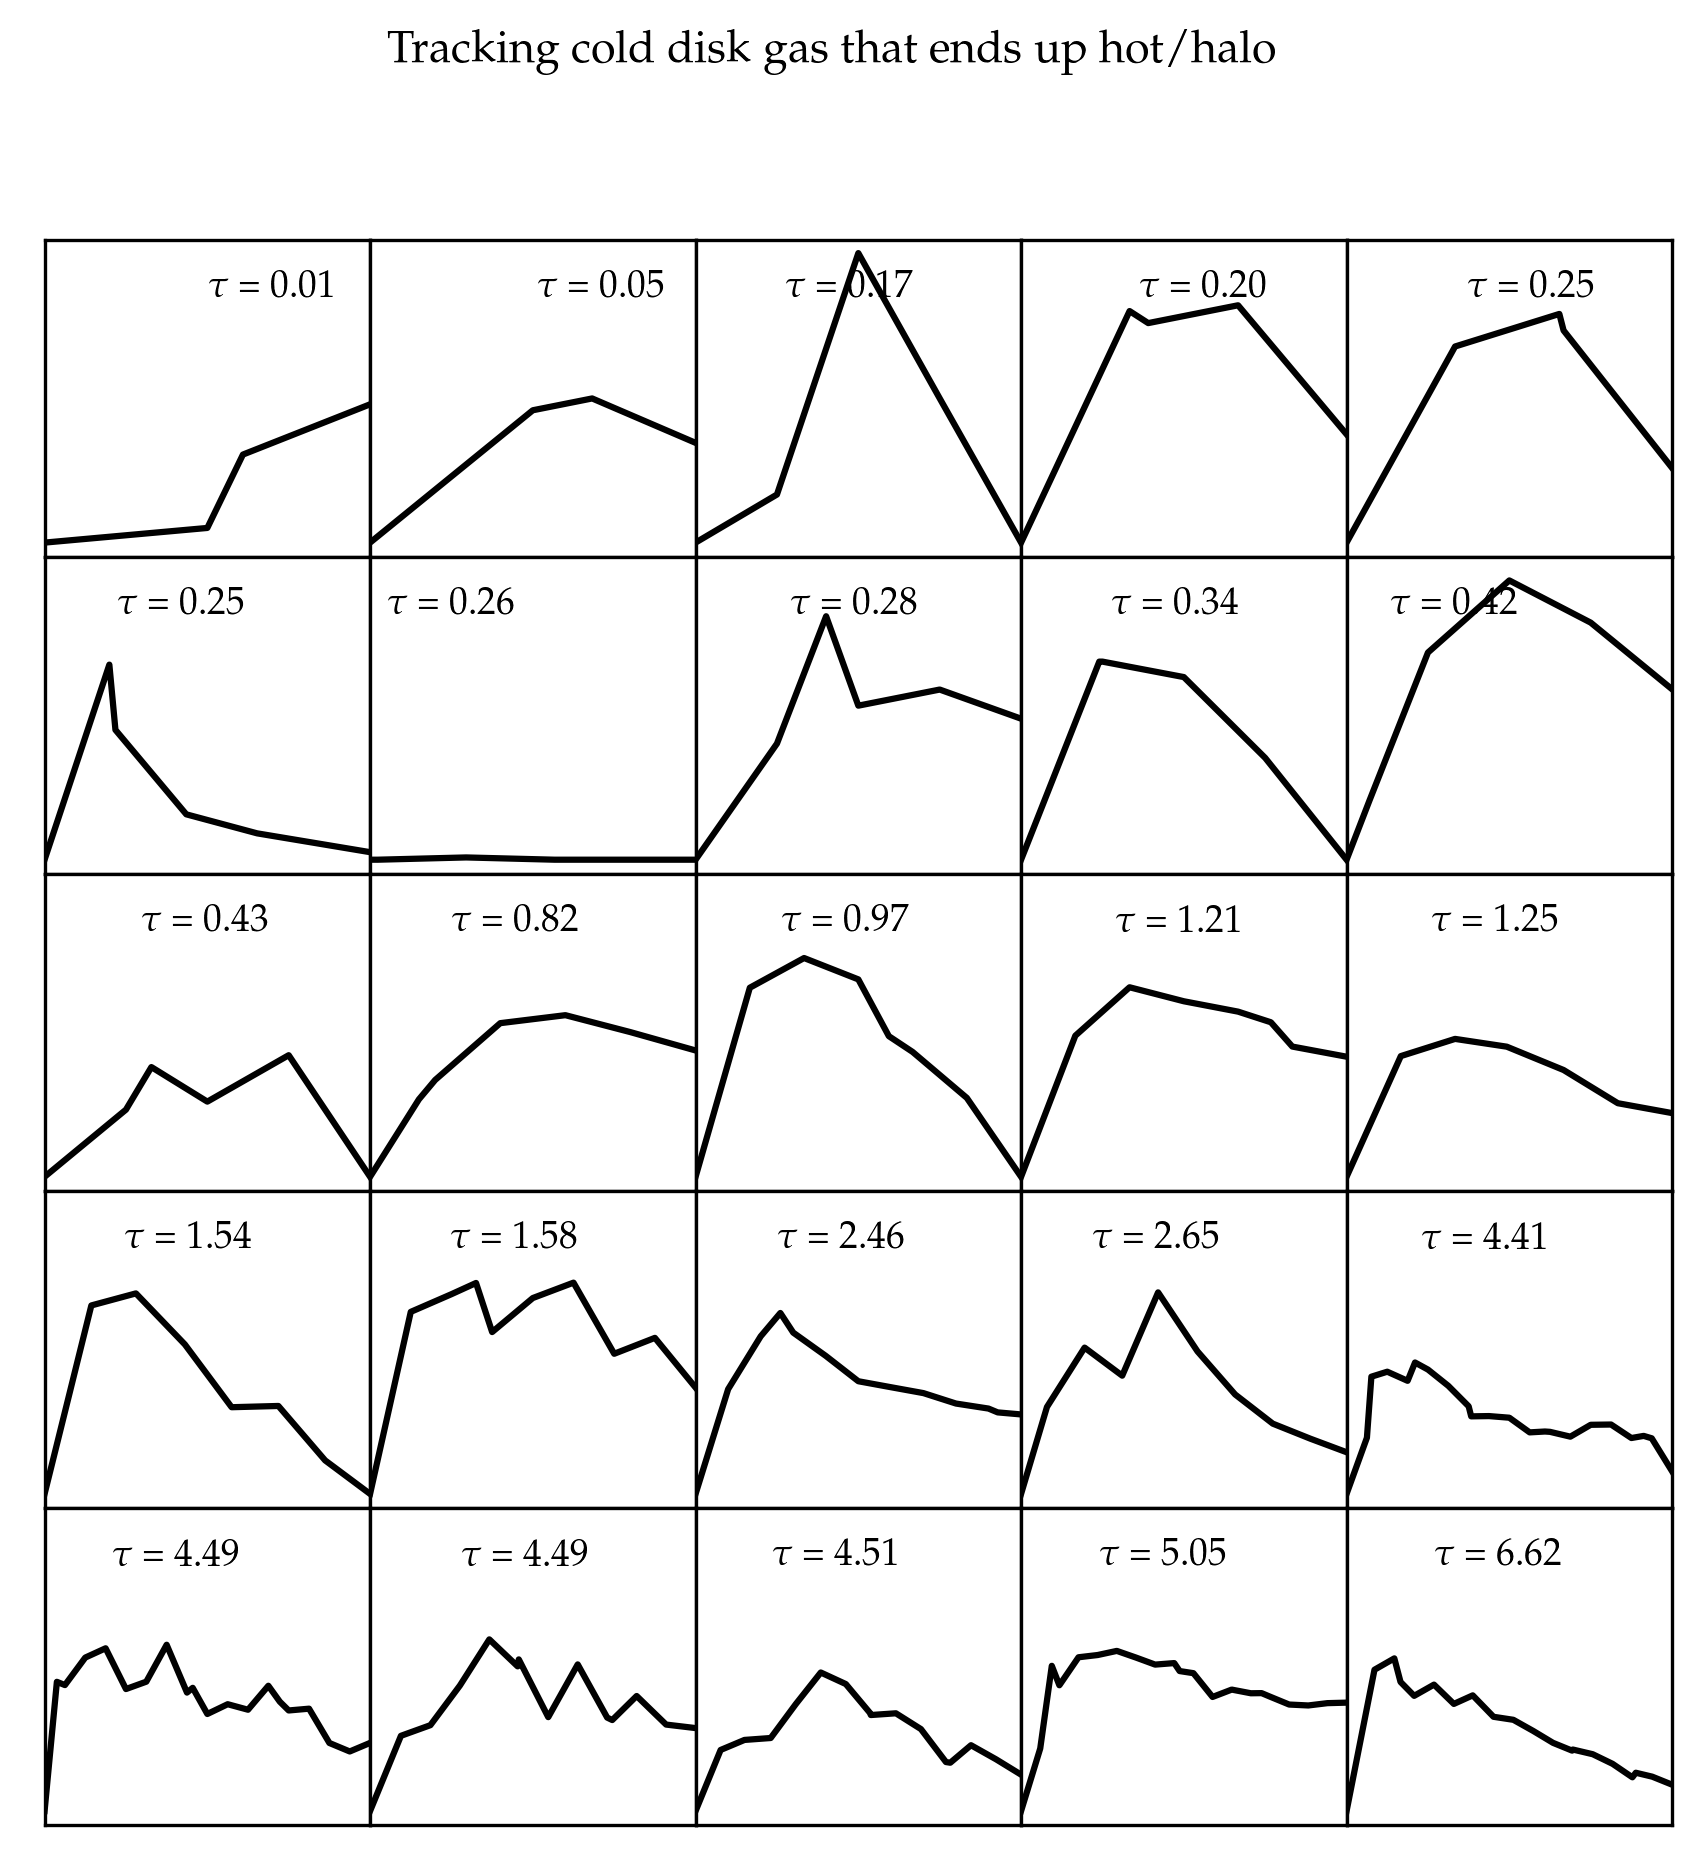

In [370]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_hot, 'k-')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking cold disk gas that ends up hot/halo')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

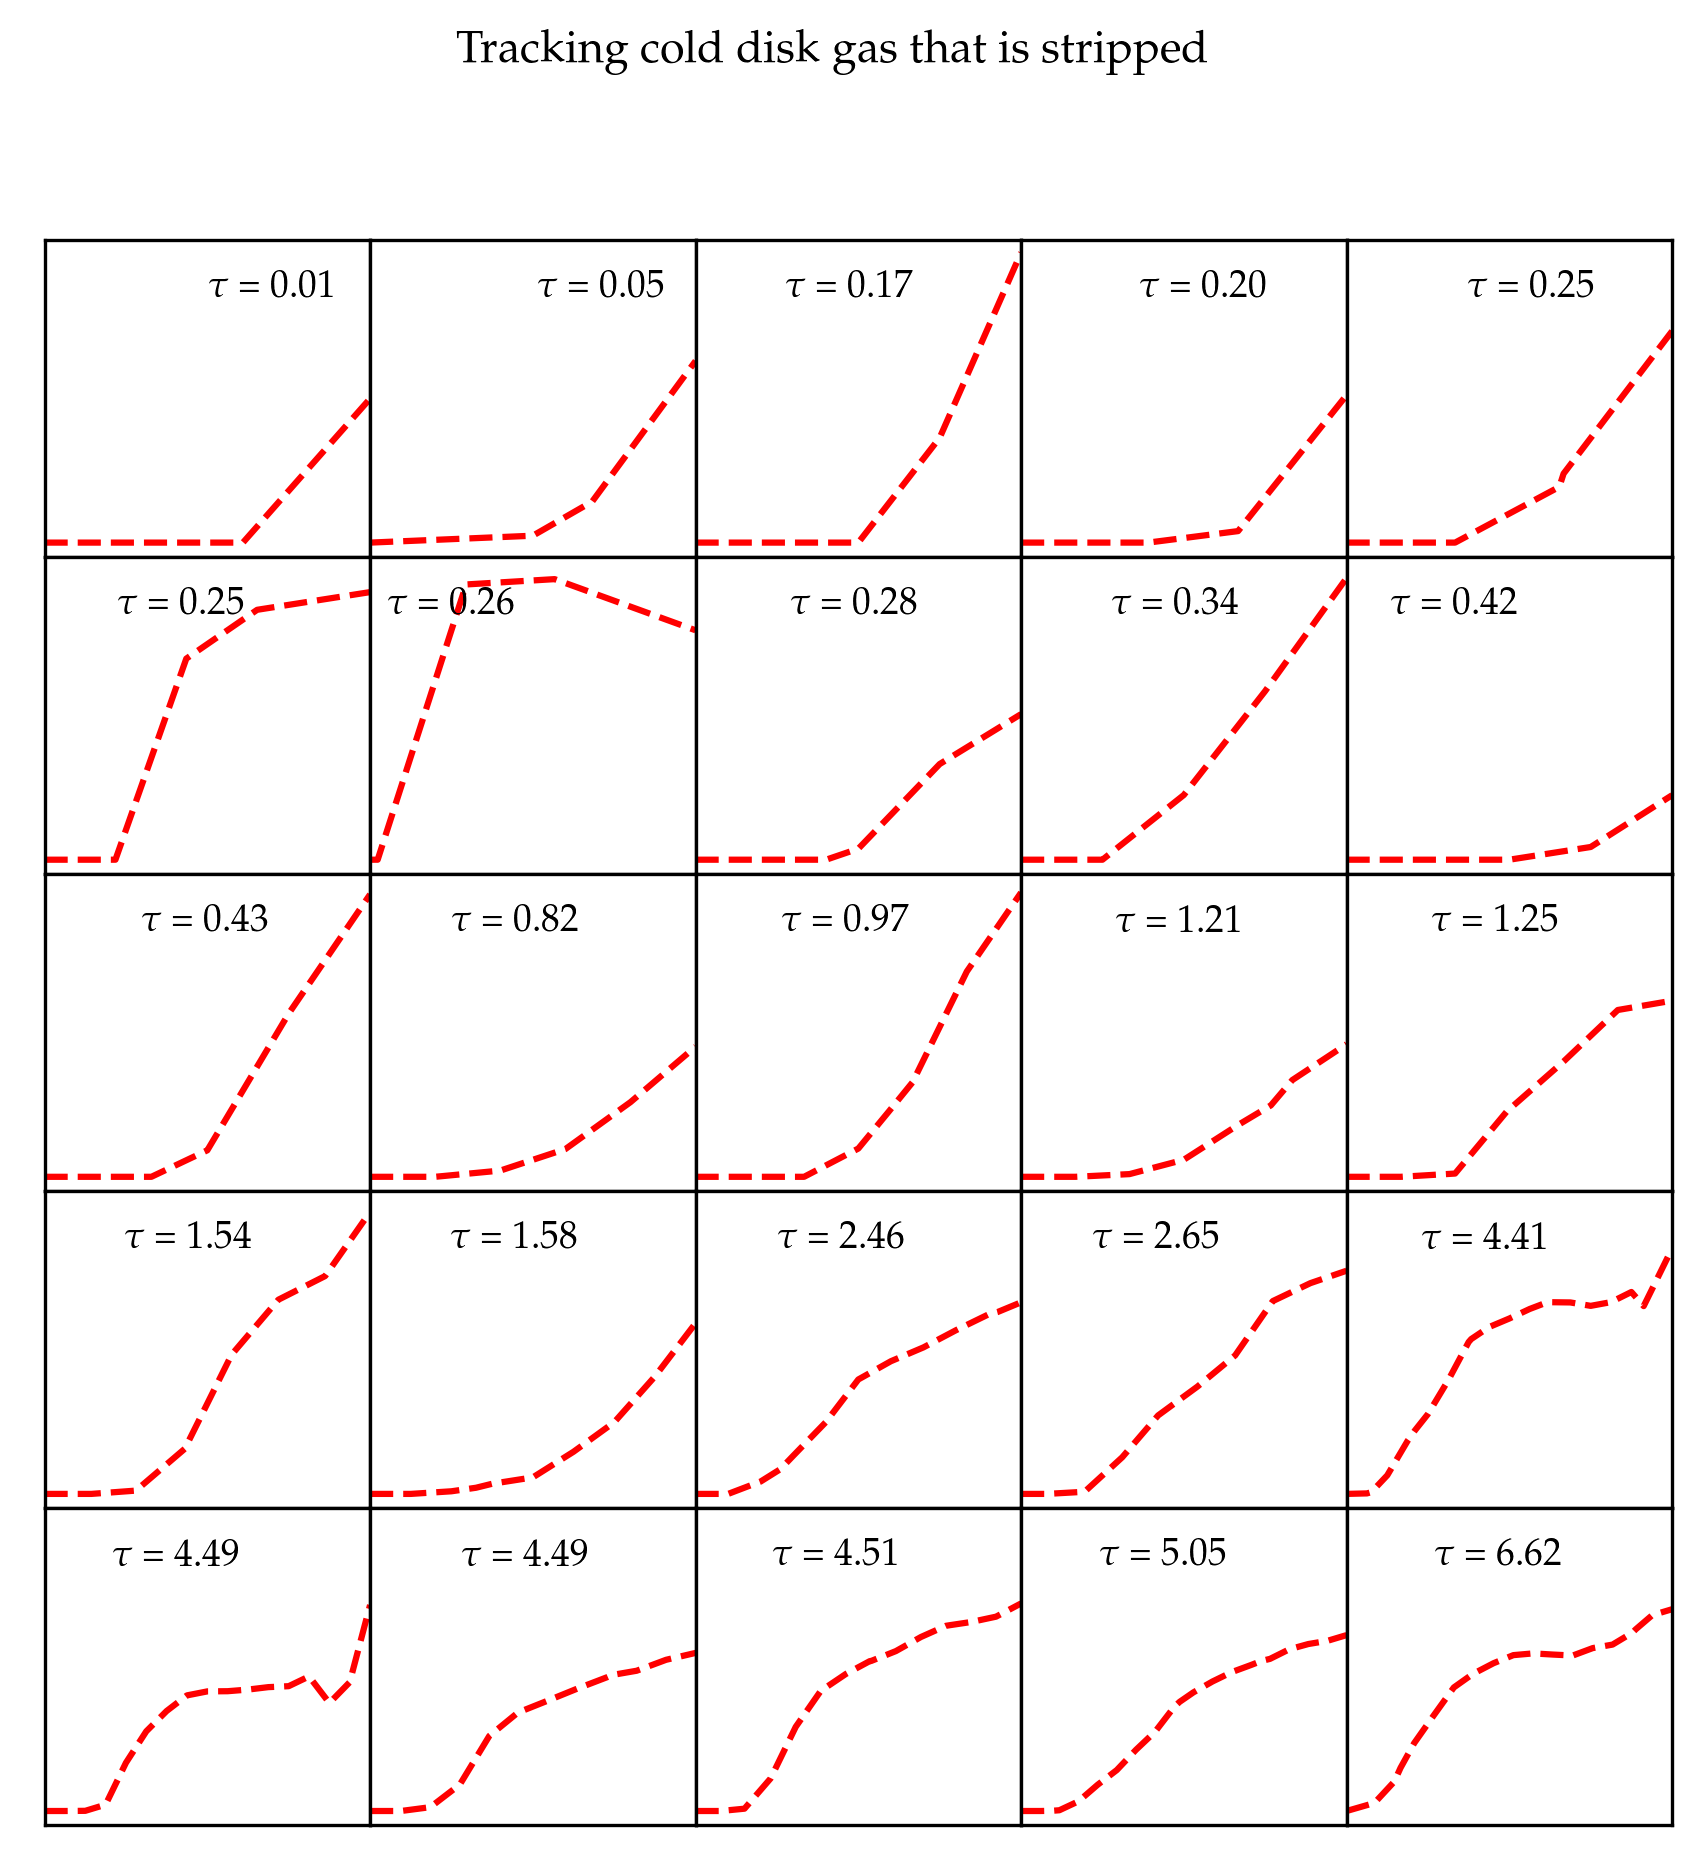

In [371]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking cold disk gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [303]:
np.core.defchararray.add(np.array(data.sim,dtype='<U21'), np.array(data.haloid,dtype='<U21'))

array(['h14813', 'h14813', 'h14813', 'h14813', 'h14813', 'h14813',
       'h14813', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14836', 'h14836', 'h14836',
       'h14836', 'h14836', 'h14837', 'h14837', 'h14837', 'h14837',
       'h14837', 'h14837', 'h14837', 'h14837', 'h14837', 'h14837',
       'h14837', 'h14837', 'h14837', 'h14837', 'h14845', 'h14845',
       'h14845', 'h14845', 'h14845', 'h14845', 'h14845', 'h14845',
       'h14845', 'h14845', 'h14848', 'h14848', 'h14848', 'h14848',
       'h14848', 'h14868', 'h14868', 'h14868', 'h14868', 'h14868',
       'h14868', 'h14868', 'h14868', 'h14868', 'h14868', 'h14868',
       'h14868', 'h14868', 'h14868', 'h14868', 'h14868', 'h148127',
       'h148127', 'h148127', 'h148127', 'h148127', 'h148127', 'h148163',
       'h148163', 'h148163', 'h148163', 'h148163', 'h14

In [344]:
sims, hids, timescales = [], [], []
for sim in np.unique(data.sim):
    da = data[data.sim==sim]
    for haloid in np.unique(da.haloid):
        d = da[da.haloid==haloid]
        sims.append(sim)
        hids.append(haloid)
        timescales.append(np.mean(d.timescale))
        
sims, hids, timescales = np.array(sims), np.array(hids), np.array(timescales)

In [349]:
sims[np.argsort(timescales)]

array(['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148'], dtype='<U4')

In [351]:
hids[np.argsort(timescales)]

array([439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28])

In [375]:
data = read_tracking_data('HotGasTracking')
data['timescales'] = data.tinfall - data.tquench

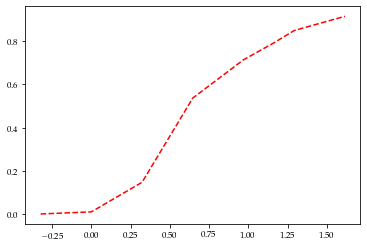

In [376]:
d = data[(data.sim=='h229')&(data.haloid==23)]
tinfall = np.mean(d.tinfall)
tquench = np.mean(d.tquench)
t = d.t - (age - tinfall)
stripped = np.array(d.frac_stripped,dtype=float)
plt.figure()
plt.plot(t, stripped, 'r--')
plt.show()

In [377]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [378]:
a, c = np.random.exponential(size=2)
b, d = np.random.randn(2)

In [379]:
n = 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * .2 * np.random.randn(n)

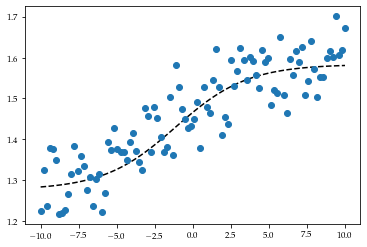

In [382]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')
plt.show()

In [387]:
import scipy.optimize as opt
(a_, b_, c_, d_), _ = opt.curve_fit(f, t, stripped)

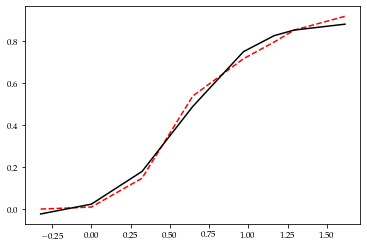

In [388]:
stripped_fit = f(t, a_, b_, c_, d_)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(t, stripped, 'r--')
ax.plot(t, stripped_fit, 'k-')
plt.show()

# Testing Some Global Stuff

In [8]:
def read_tracking_data(name):
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open(f'../../Data/stripping_data/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

First time 0.9*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.97 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.47 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.43 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.88 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.20 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.05 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max o

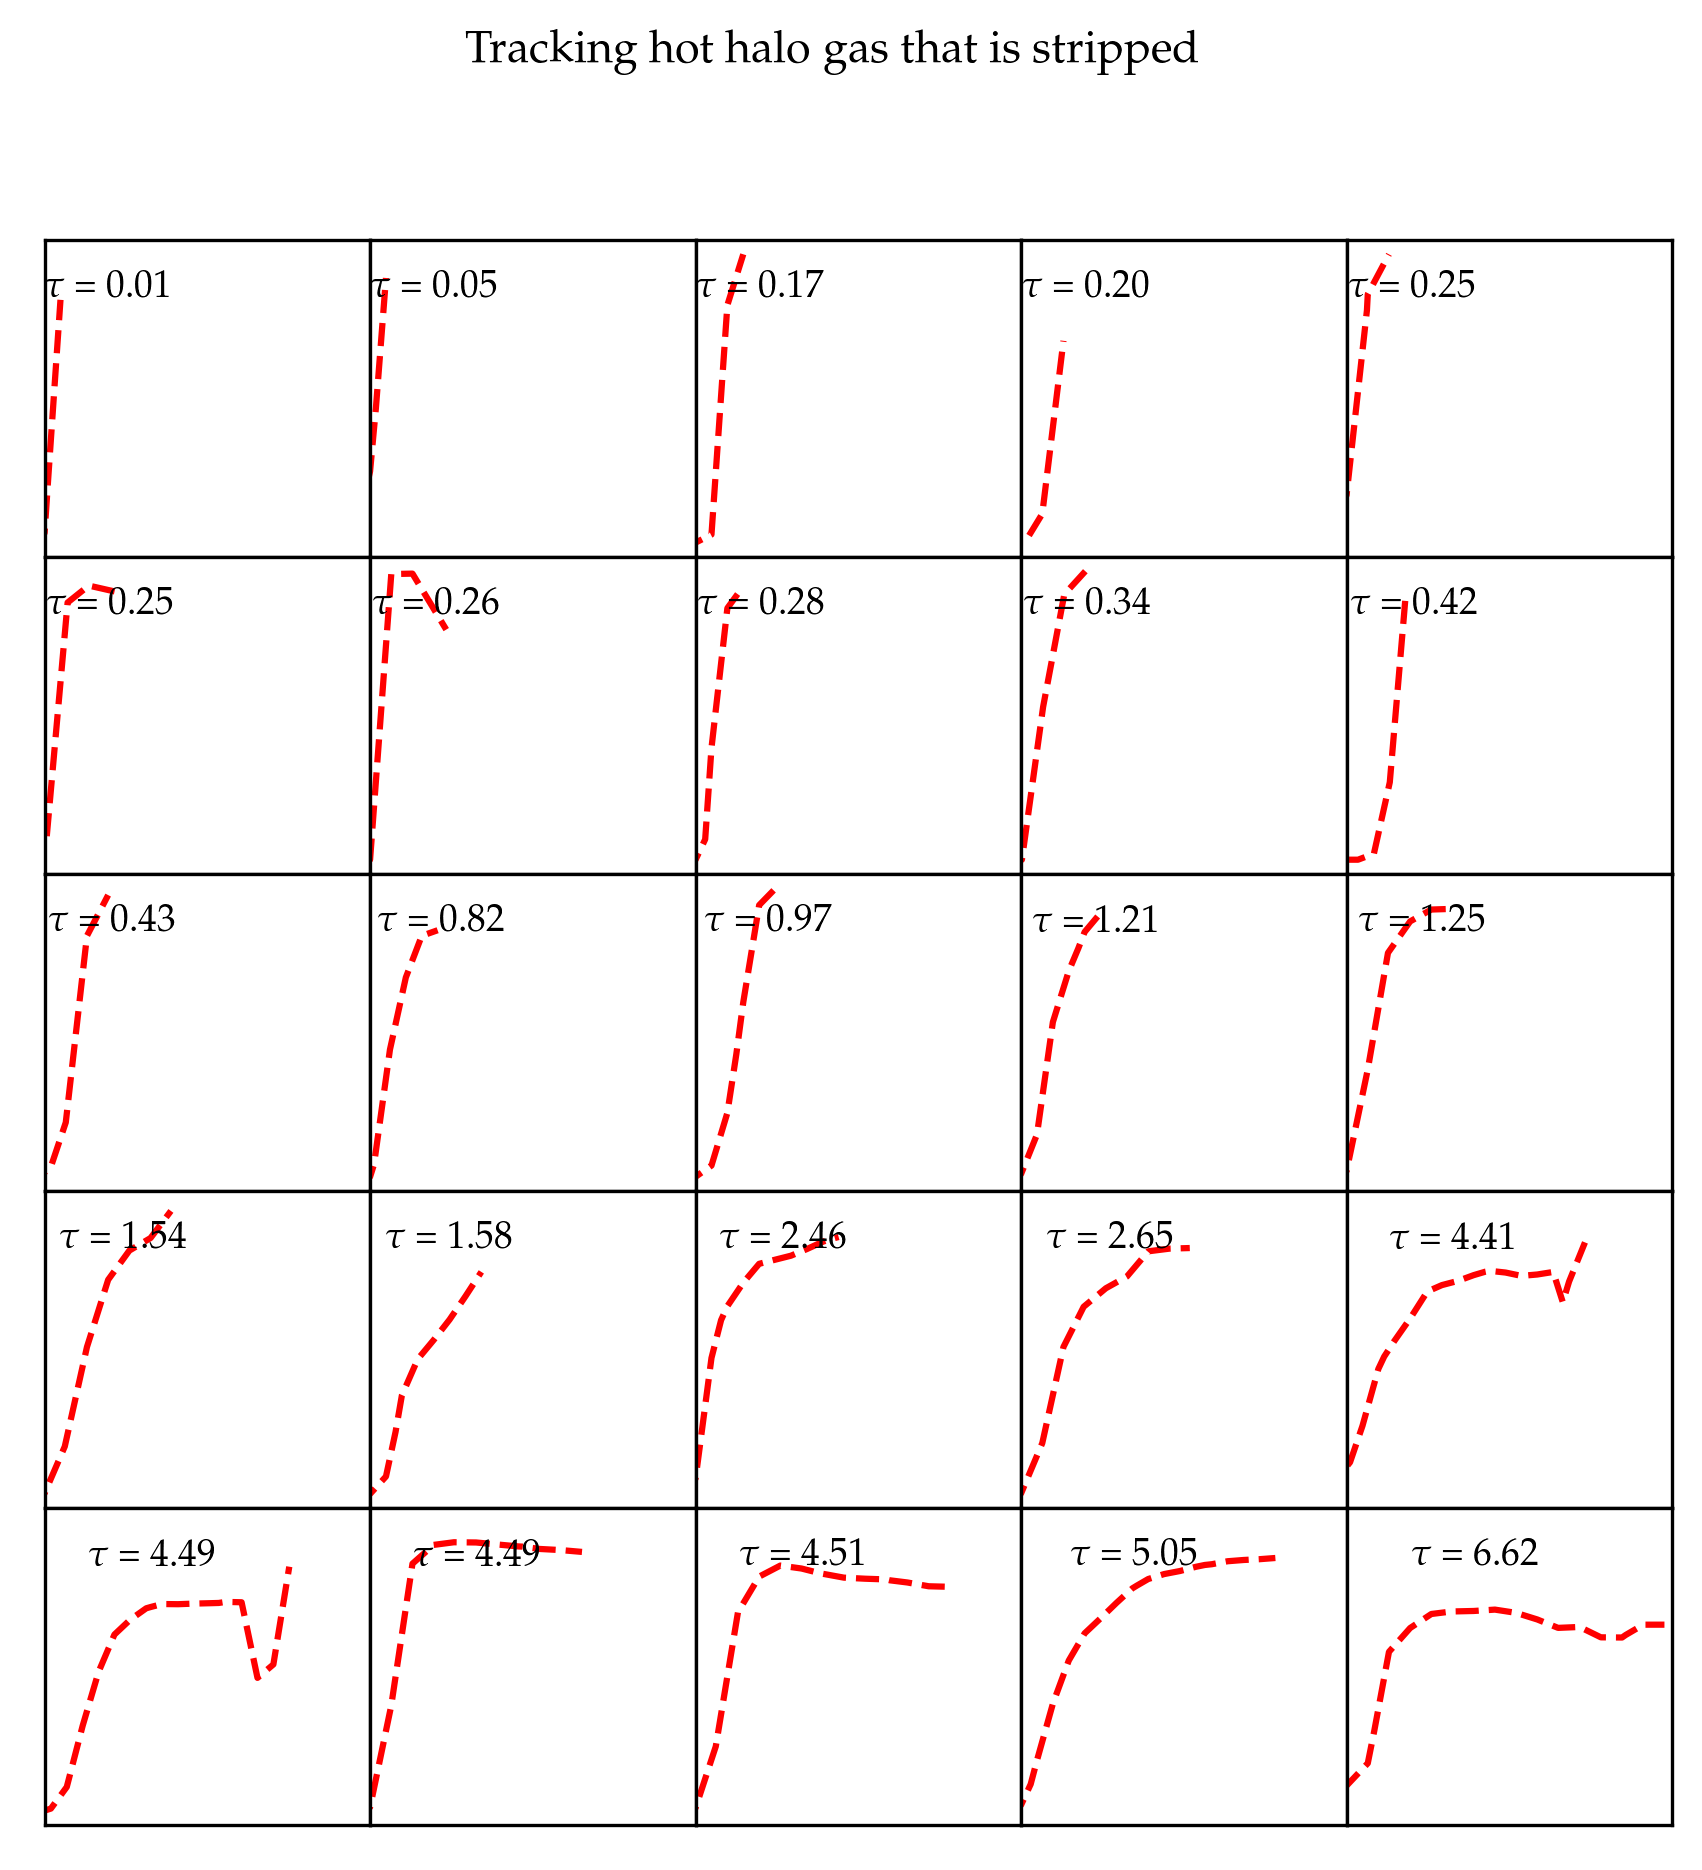

In [405]:
data = read_tracking_data('HotGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        for time, frac in zip(t,frac_stripped):
            if frac > 0.9*np.max(frac_stripped):
                print(f'First time 0.9*max of Frac stripped is reached: {time:.2f} Gyr after infall')
                break

        j += 1
    
fig.suptitle('Tracking hot halo gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

First time 0.1*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.12 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.41 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.47 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.43 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.45 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.88 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.73 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.83 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max o

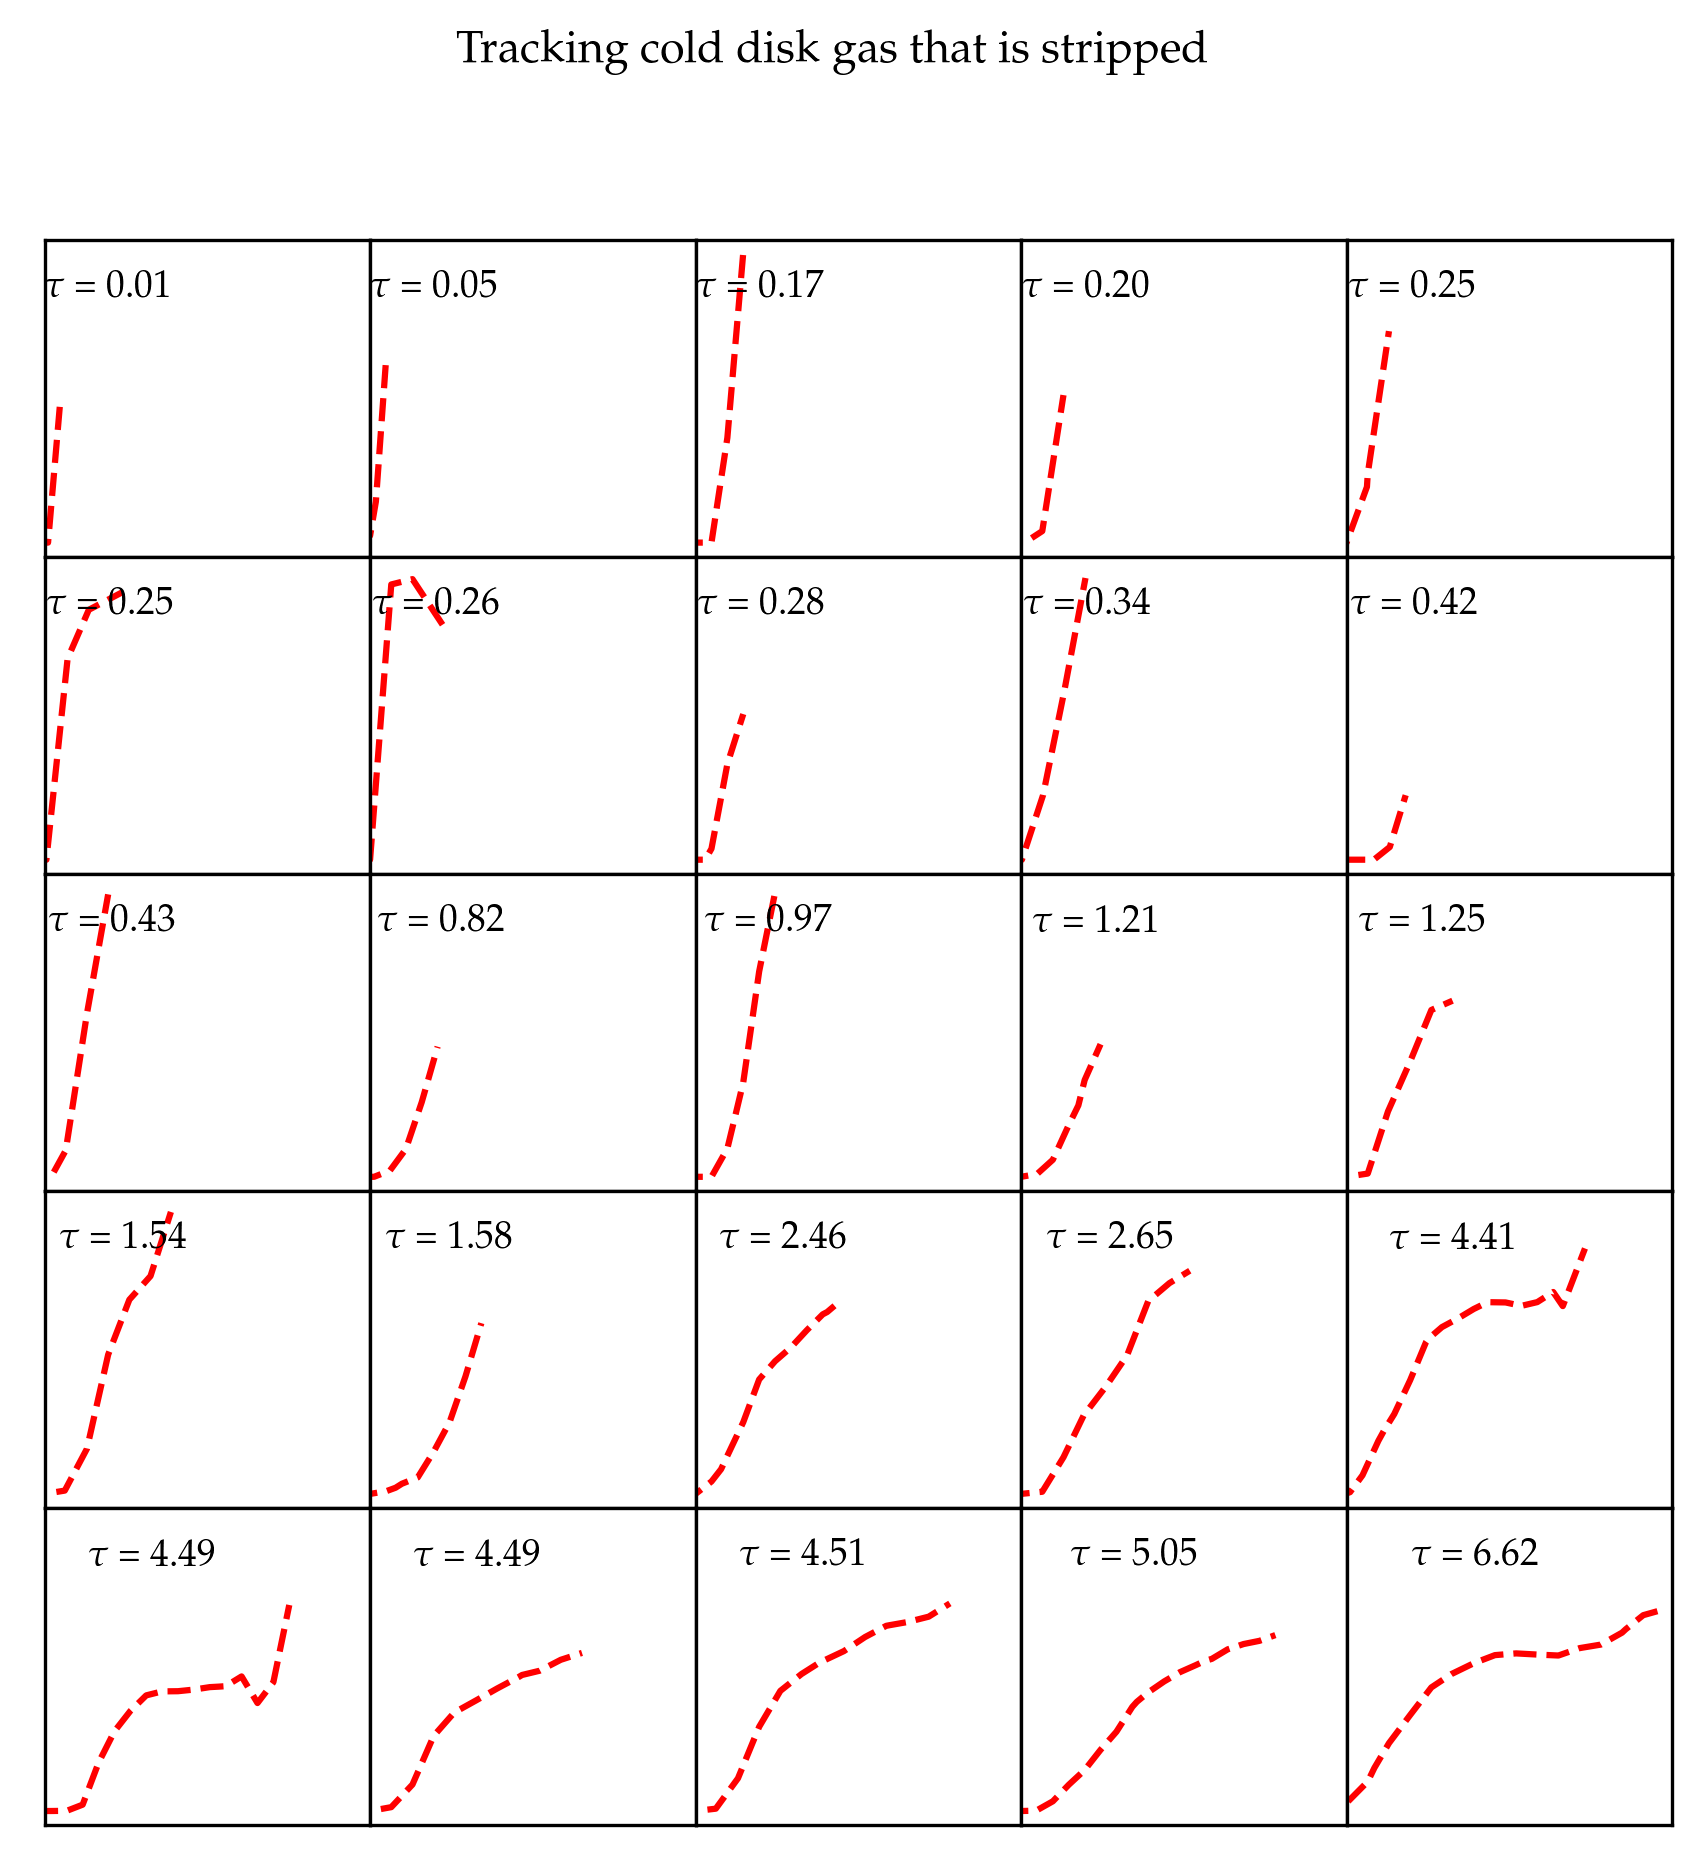

In [407]:
data = read_tracking_data('ColdGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        for time, frac in zip(t,frac_stripped):
            if frac > 0.1*np.max(frac_stripped):
                print(f'First time 0.1*max of Frac stripped is reached: {time:.2f} Gyr after infall')
                break

        j += 1
    
fig.suptitle('Tracking cold disk gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [443]:
ColdData = read_tracking_data('ColdGasTracking')
ColdData['timescale'] = np.array(ColdData.tinfall) - np.array(ColdData.tquench)
HotData = read_tracking_data('HotGasTracking')
HotData['timescale'] = np.array(HotData.tinfall) - np.array(HotData.tquench)

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

t60_hot, t60_cold, taus = [], [], []
for sim, haloid in zip(sims_sorted, haloids_sorted):
    
    d = HotData[(HotData.sim==sim)&(HotData.haloid == haloid)]
    d2 = ColdData[(ColdData.sim==sim)&(ColdData.haloid==haloid)]
    
    tinfall = np.mean(d.tinfall)
    tquench = np.mean(d.tquench)
    t = np.array(d.t - (age - tinfall))
    taus.append(tinfall-tquench)
    
    Hot_frac_stripped = np.array(d.frac_stripped)
    Cold_frac_stripped = np.array(d2.frac_stripped)
    
    complete = False
    for time, frac in zip(t,Hot_frac_stripped):
        if (frac > 0.6) and (complete==False):
            print(f'First time 60% of hot gas at infall is removed: {time:.2f} Gyr after infall')
            t60_hot.append(time)
            complete = True
    
    complete = False
    for time, frac in zip(t,Cold_frac_stripped):
        if (frac > 0.6) and (complete==False):
            print(f'First time 60% of cold gas at infall is removed: {time:.2f} Gyr after infall')
            t60_cold.append(time)
            complete = True

7.326666467273415
nan
nan
nan
First time 60% of hot gas at infall is removed: 0.86 Gyr after infall
First time 60% of cold gas at infall is removed: 1.29 Gyr after infall
1.7239215218961164
First time 60% of hot gas at infall is removed: 0.41 Gyr after infall
First time 60% of cold gas at infall is removed: 0.86 Gyr after infall
3.447843043558656
9.518605745786113
First time 60% of hot gas at infall is removed: 0.43 Gyr after infall
First time 60% of cold gas at infall is removed: 0.43 Gyr after infall
9.481568369344389
nan
First time 60% of hot gas at infall is removed: 0.88 Gyr after infall
First time 60% of cold gas at infall is removed: 1.31 Gyr after infall
3.0336978342544243
nan
First time 60% of hot gas at infall is removed: 0.86 Gyr after infall
First time 60% of cold gas at infall is removed: 1.29 Gyr after infall
6.895686086860574
nan
nan
nan
First time 60% of hot gas at infall is removed: 0.84 Gyr after infall
First time 60% of cold gas at infall is removed: 2.15 Gyr after i

ValueError: x and y must be the same size

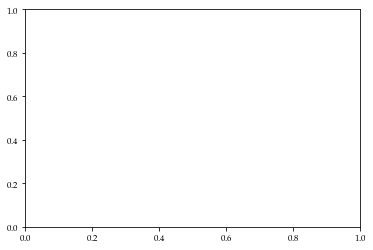

In [442]:
plt.scatter(taus,t60_hot,c='r')
plt.scatter(taus,t60_cold,c='b')
plt.show()uu

In [444]:
len(haloids_sorted)

25

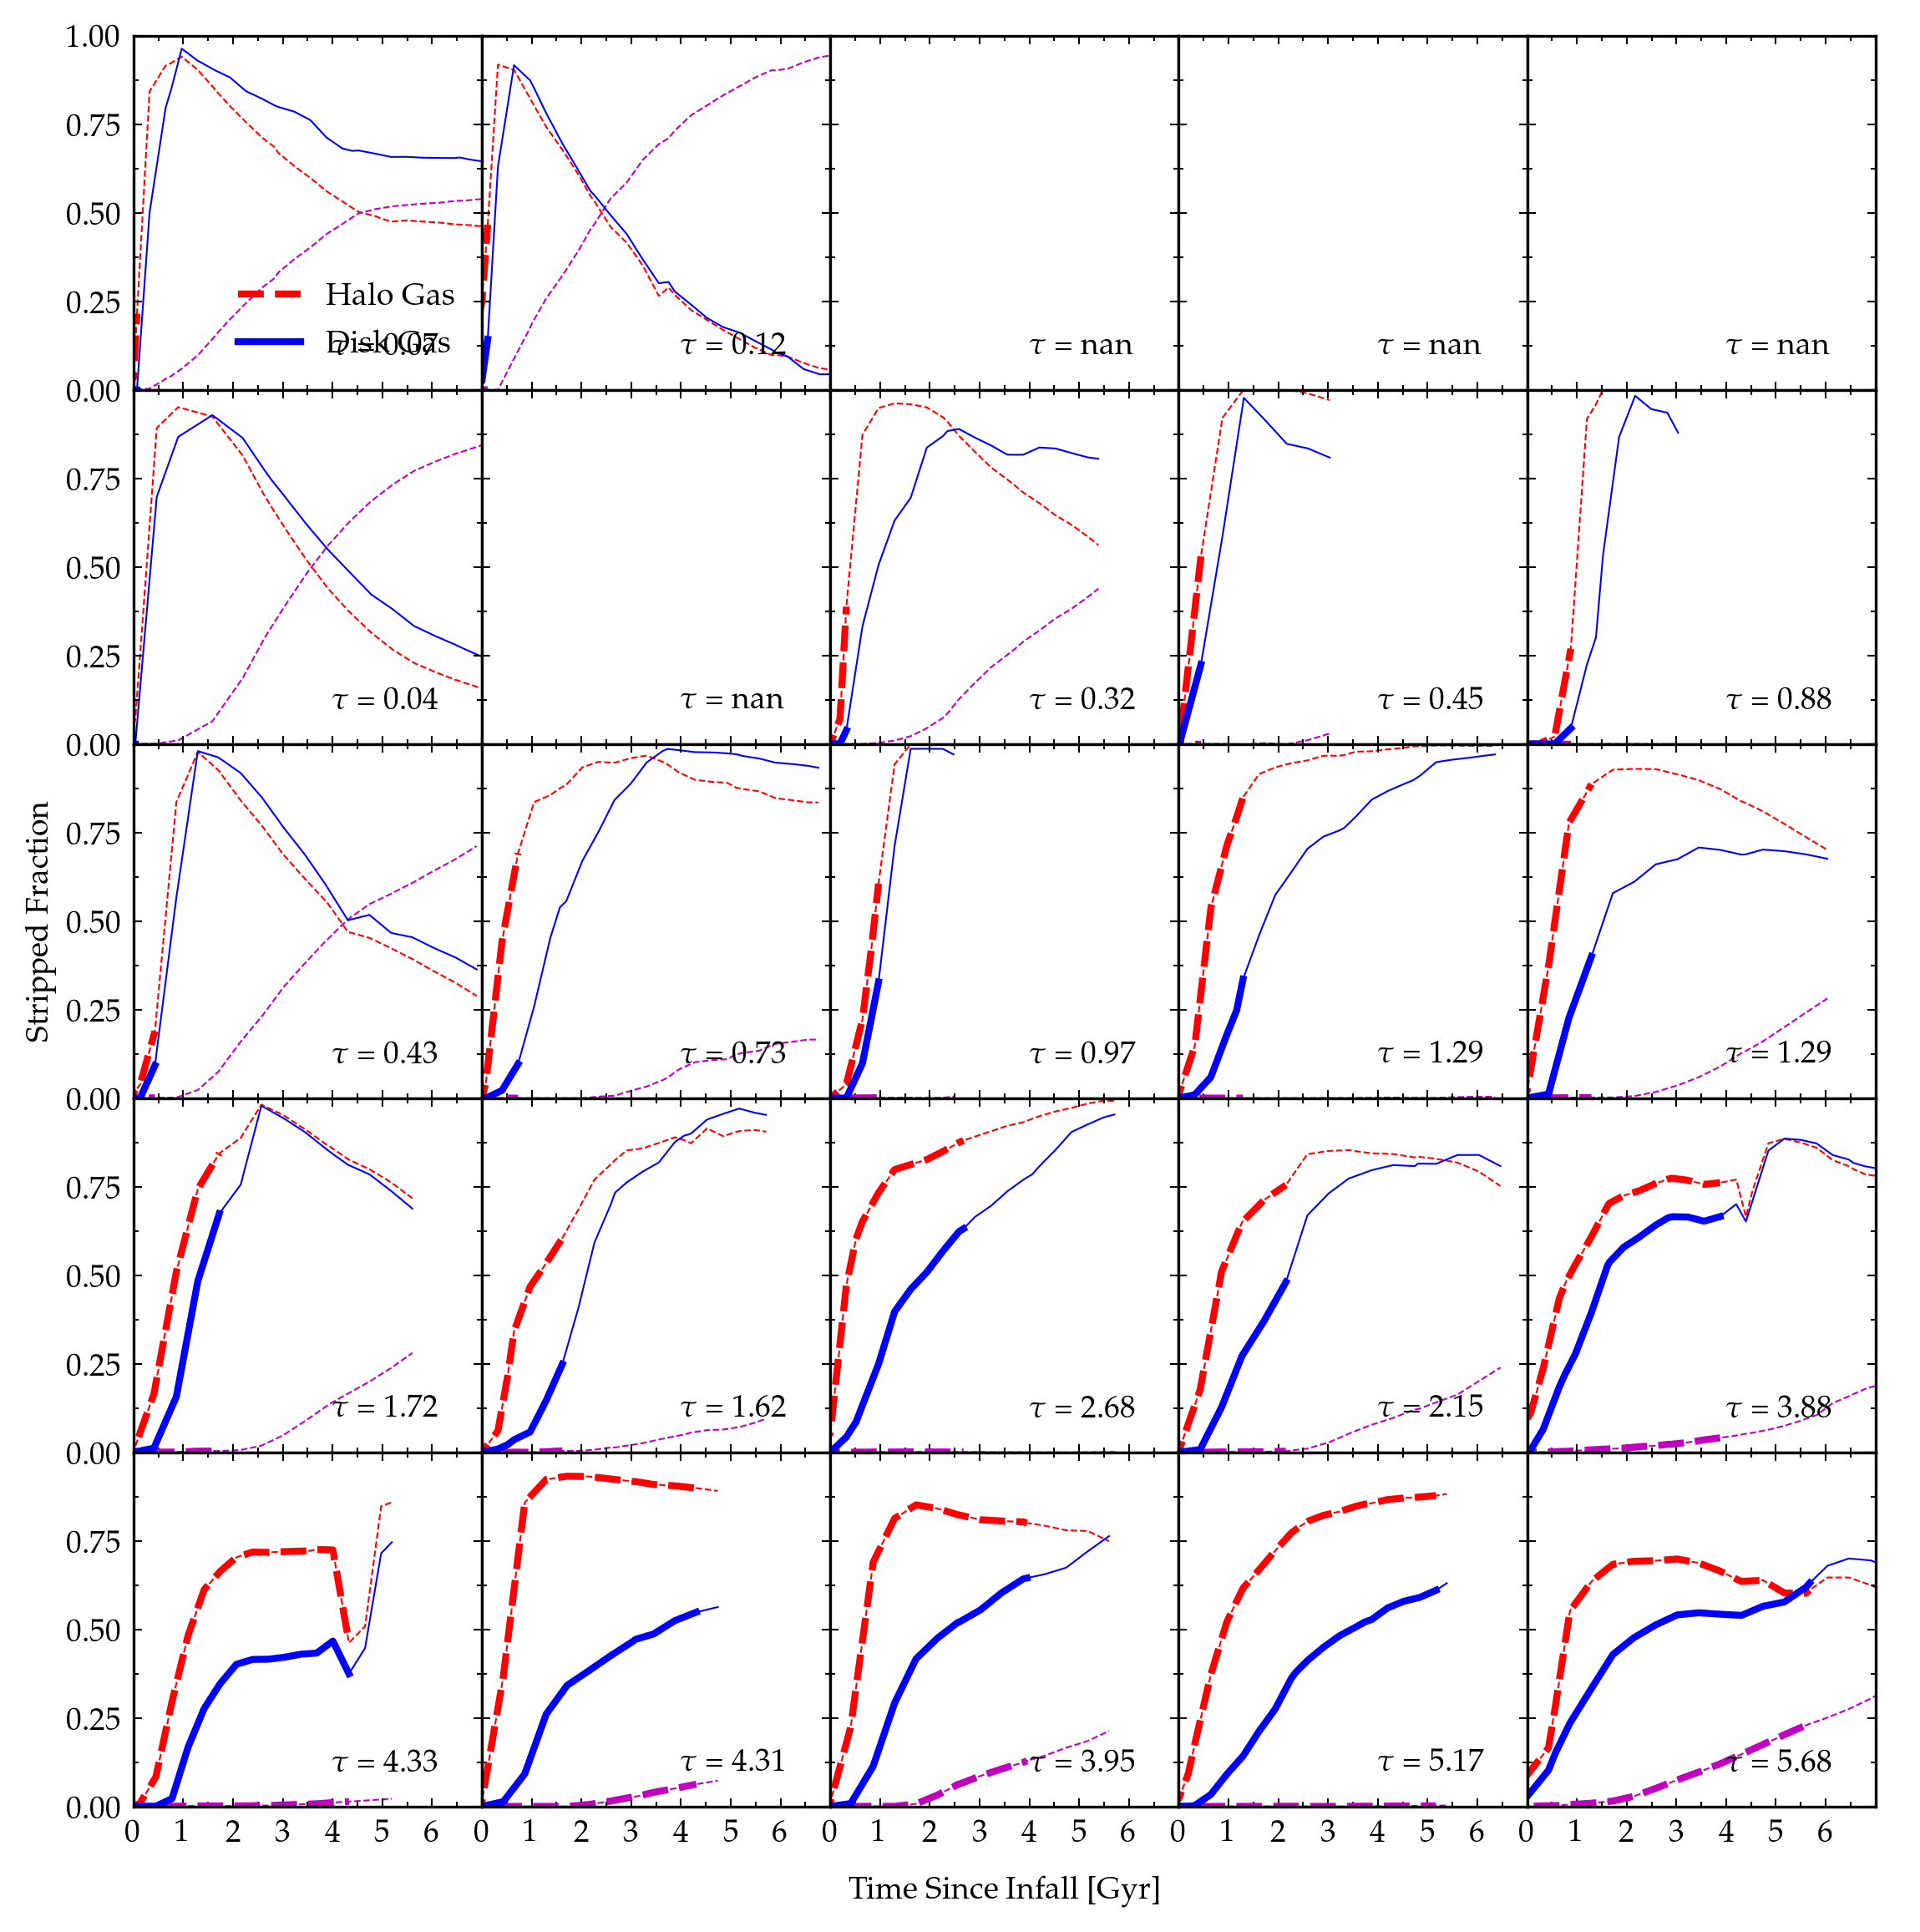

In [65]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

i,j = 0,0
fig, ax = plt.subplots(5,5,dpi=300,figsize=(8,8))
data = read_tracking_data('HotGasTracking')
tau_hot, t60_hot,t60_hot_haloid,t60_hot_sim = np.array([]), np.array([]), np.array([]), np.array([])

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        
        frac_stripped = np.array(d.frac_stripped)
        
        ax[i,j].plot(time, frac_stripped, 'r--', linewidth=0.5, zorder=1)
        ax[i,j].plot(time[time<tau], frac_stripped[time<tau], 'r--', linewidth=2, label='Halo Gas', zorder=2)
        
        frac_stars = np.array(d.frac_stars)        
        ax[i,j].plot(time, frac_stars, 'm--', linewidth=0.5, zorder=1)
        ax[i,j].plot(time[time<tau], frac_stars[time<tau], 'm--', linewidth=2, zorder=2)
        
        
        for t, frac in zip(time,frac_stripped):
            if frac > 0.6:
                t60_hot = np.append(t60_hot,t)
                tau_hot = np.append(tau_hot,tau)
                t60_hot_haloid = np.append(t60_hot_haloid,haloid)
                t60_hot_sim = np.append(t60_hot_sim,sim)
                break

        j += 1

i,j = 0,0
data = read_tracking_data('ColdGasTracking')
tau_cold, t60_cold,t60_cold_haloid,t60_cold_sim = np.array([]), np.array([]),np.array([]), np.array([])

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(time, frac_stripped, 'b-',linewidth=0.5,zorder=1)
        ax[i,j].plot(time[time<tau], frac_stripped[time<tau],'b-', linewidth=2, label='Disk Gas', zorder=2)
        
        ax[i,j].set_ylim(0,1)
        ax[i,j].set_xlim(0,7)
        ax[i,j].annotate(fr'$\tau$ = {tau:.2f}',(4, 0.1))
        
        ax[i,j].set_xticks([0,1,2,3,4,5,6])
        ax[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
        
        ax[i,j].set_yticks([0,0.25,0.5,0.75])
        if i==0:
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            if j==0:
                ax[i,j].legend(frameon=False)
        
        ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.125))
        
        ax[i,j].tick_params(direction='in',which='major', width=0.5, length=2.5)
        ax[i,j].tick_params(direction='in',which='minor', width=0.5, length=1.5)
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        
        if (i!=4):
            ax[i,j].set_xticklabels([])
        if (j!=0):
            ax[i,j].set_yticklabels([])
            
        
        
        for t, frac in zip(time,frac_stripped):
            if frac > 0.6:
                t60_cold = np.append(t60_cold,t)
                t60_cold_haloid = np.append(t60_cold_haloid,haloid)
                t60_cold_sim = np.append(t60_cold_sim,sim)
                tau_cold = np.append(tau_cold,tau)
                break
        
            
        j += 1
    
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel("Stripped Fraction")
plt.xlabel("Time Since Infall [Gyr]")    

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

# plt.savefig('Stripped_Fractions.png',dpi=300)
plt.show()

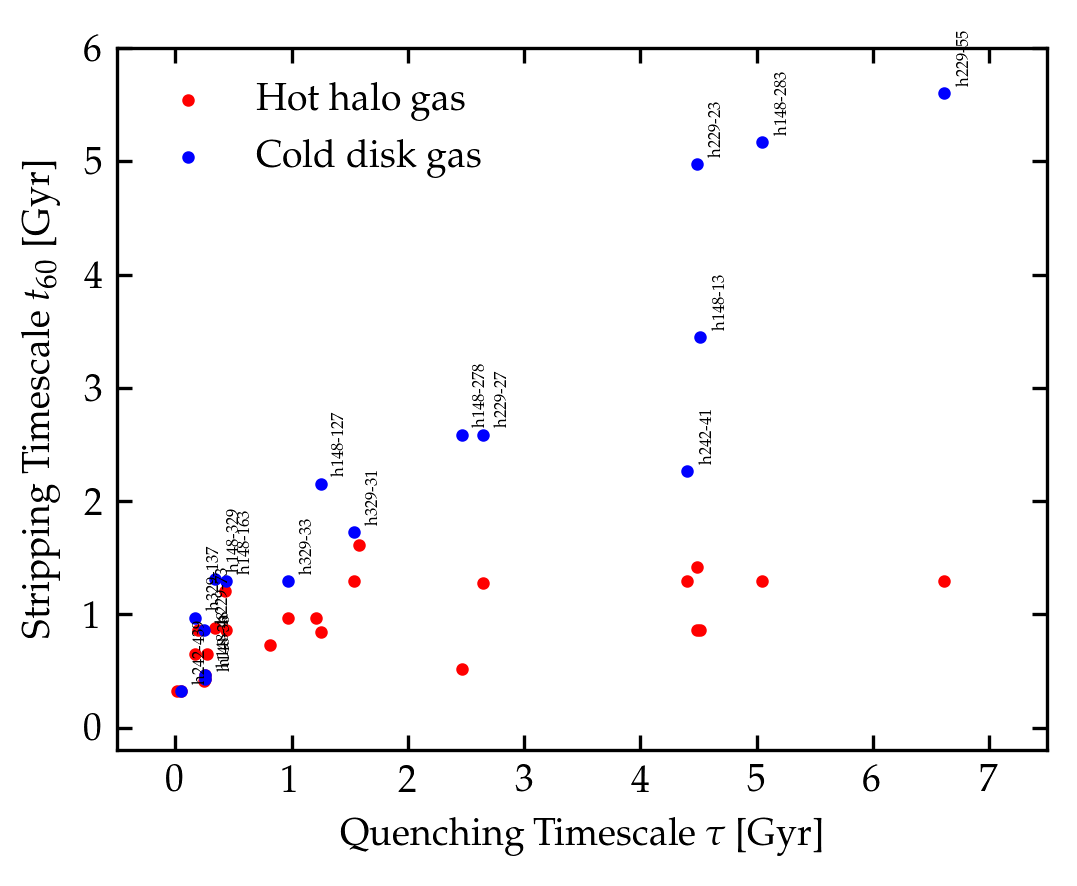

In [481]:
xmin, xmax = -0.5, 7.5
ymin, ymax = -0.2, 6

yscale = (ymax-ymin)*4/(xmax-xmin)

fig, ax = plt.subplots(figsize=(4,yscale),dpi=300)

ax.scatter(tau_hot, t60_hot, c='r', s=4, label='Hot halo gas')
ax.scatter(tau_cold, t60_cold, c='b', s=4, label='Cold disk gas')

ax.set_xlabel(r'Quenching Timescale $\tau$ [Gyr]')
ax.set_ylabel('Stripping Timescale $t_{60}$ [Gyr]')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

for i,(x,y) in enumerate(zip(tau_cold,t60_cold)):
    ax.annotate(str(sims_sorted[i]+'-'+str(haloids_sorted[i])),(x+0.1,y+0.1), rotation=90,size=4)

ax.legend(frameon=False)
plt.show()

In [723]:
h148_syst_err = 0.31722272420473
other_syst_err = 0.22216906137112474
    
data = read_timescales()

tau_cold_upper_err,tau_cold_lower_err,tau_cold_syst_err = np.array([]),np.array([]), np.array([])
for haloid, sim in zip(t60_cold_haloid,t60_cold_sim):
    d = data[(data.haloid==haloid)&(data.sim==sim)]
    tquench_lower = d.tquench_lower.tolist()[0]
    tquench_upper = d.tquench_upper.tolist()[0]
    tquench = d.tquench.tolist()[0]
    tinfall_lower = d.tinfall_lower.tolist()[0]
    tinfall_upper = d.tinfall_upper.tolist()[0]
    tinfall = d.tinfall.tolist()[0]
    
    if sim=='h148':
        syst_err = h148_syst_err
    else:
        syst_err = other_syst_err
    
    # intentionally switched, a weirdness that comes from using LBT vs regular time
    tq_lower_err = np.sqrt(np.abs(tquench-tquench_upper)**2 + syst_err**2)
    tq_upper_err = np.sqrt(np.abs(tquench-tquench_lower)**2 + syst_err**2)
    ti_lower_err = np.sqrt(np.abs(tinfall-tinfall_upper)**2 + syst_err**2)
    ti_upper_err = np.sqrt(np.abs(tinfall-tinfall_lower)**2 + syst_err**2)
    
    tau_upper_err = np.sqrt(tq_upper_err**2 + ti_upper_err**2 + 2*syst_err**2)
    tau_lower_err = np.sqrt(tq_lower_err**2 + ti_lower_err**2 + 2*syst_err**2)
    tau_cold_upper_err = np.append(tau_cold_upper_err, tau_upper_err)
    tau_cold_lower_err = np.append(tau_cold_lower_err, tau_lower_err)
    tau_cold_syst_err = np.append(tau_cold_syst_err,syst_err)
    

tau_hot_upper_err,tau_hot_lower_err,tau_hot_syst_err = np.array([]),np.array([]), np.array([])
for haloid, sim in zip(t60_hot_haloid,t60_hot_sim):
    d = data[(data.haloid==haloid)&(data.sim==sim)]
    tquench_lower = d.tquench_lower.tolist()[0]
    tquench_upper = d.tquench_upper.tolist()[0]
    tquench = d.tquench.tolist()[0]
    tinfall_lower = d.tinfall_lower.tolist()[0]
    tinfall_upper = d.tinfall_upper.tolist()[0]
    tinfall = d.tinfall.tolist()[0]
    
    if sim=='h148':
        syst_err = h148_syst_err
    else:
        syst_err = other_syst_err
    
    # intentionally switched, a weirdness that comes from using LBT vs regular time
    tq_lower_err = np.sqrt(np.abs(tquench-tquench_upper)**2 + syst_err**2)
    tq_upper_err = np.sqrt(np.abs(tquench-tquench_lower)**2 + syst_err**2)
    ti_lower_err = np.sqrt(np.abs(tinfall-tinfall_upper)**2 + syst_err**2)
    ti_upper_err = np.sqrt(np.abs(tinfall-tinfall_lower)**2 + syst_err**2)
    
    tau_upper_err = np.sqrt(tq_upper_err**2 + ti_upper_err**2 + 2*syst_err**2)
    tau_lower_err = np.sqrt(tq_lower_err**2 + ti_lower_err**2 + 2*syst_err**2)
    tau_hot_upper_err = np.append(tau_hot_upper_err, tau_upper_err)
    tau_hot_lower_err = np.append(tau_hot_lower_err, tau_lower_err)
    tau_hot_syst_err = np.append(tau_hot_syst_err,syst_err)

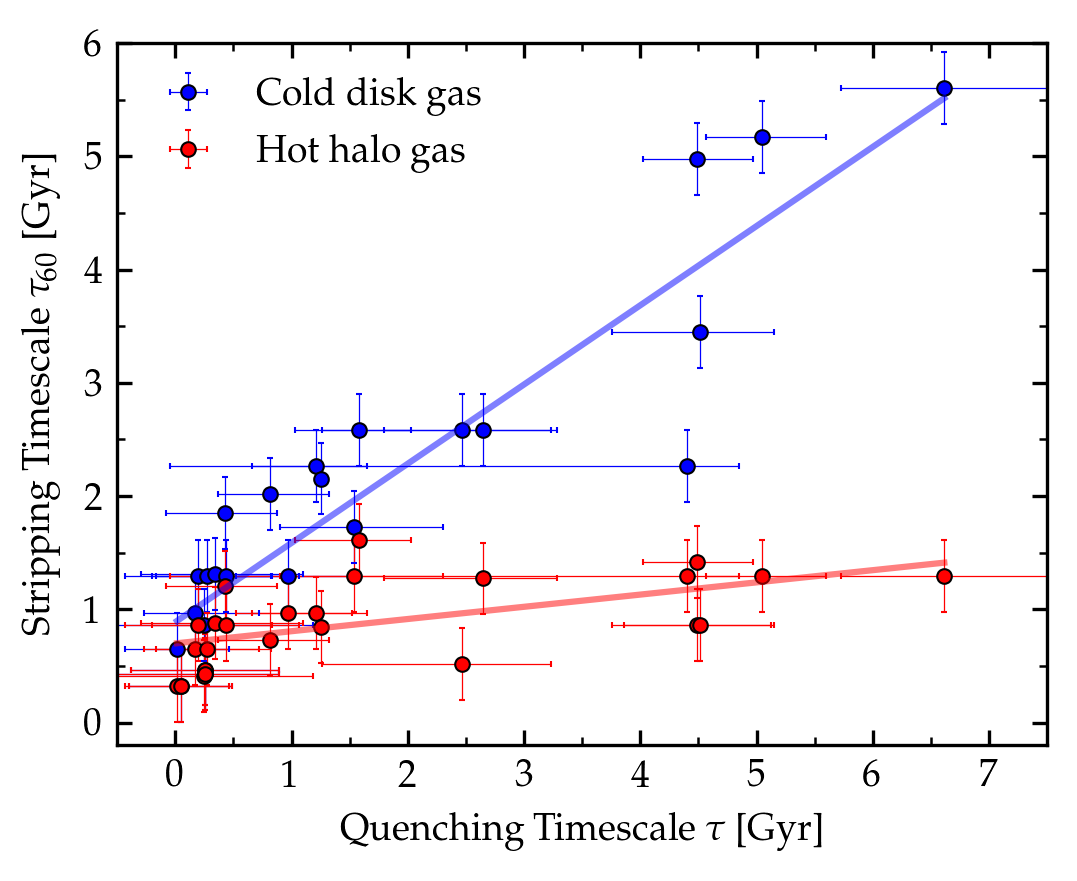

In [733]:
xmin, xmax = -0.5, 7.5
ymin, ymax = -0.2, 6

yscale = (ymax-ymin)*4/(xmax-xmin)

fig, ax = plt.subplots(figsize=(4,yscale),dpi=300)

# ax.scatter(tau_hot, t60_hot, c='r', s=15, label='Hot halo gas',zorder=10, edgecolor='k', linewidths=0.3)
# ax.scatter(tau_cold, t60_cold, c='b', s=15, label='Cold disk gas',zorder=10, edgecolor='k', linewidths=0.3)

ax.errorbar(tau_cold,t60_cold, 
            xerr = [tau_cold_lower_err, tau_cold_upper_err],
            yerr=syst_err,
            fmt='.',
            ms=7,
            elinewidth=0.3,
            capsize=0.8,
            capthick=0.3,
            mec='k',
            mew=0.5,
            c='b', label='Cold disk gas', zorder=1)

ax.errorbar(tau_hot,t60_hot, 
            xerr = [tau_hot_lower_err, tau_hot_upper_err],
            yerr=syst_err,
            fmt='.',
            ms=7,
            elinewidth=0.3,
            capsize=0.8,
            capthick=0.3,
            mec='k',
            mew=0.5,
            c='r', label='Hot halo gas', zorder=1)

# linear fit for the hot gas data
m,b = np.polyfit(tau_hot, t60_hot, 1)
ax.plot(tau_hot, tau_hot*m+b, 'r-',alpha=0.5)

# linear fit for the cold gas data
m,b = np.polyfit(tau_cold, t60_cold, 1)
ax.plot(tau_cold, tau_cold*m+b, 'b-',alpha=0.5)


ax.set_xlabel(r'Quenching Timescale $\tau$ [Gyr]')
ax.set_ylabel(r'Stripping Timescale $\tau_{60}$ [Gyr]')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

ax.legend(frameon=False)
# plt.savefig('stripping_timescale.png', dpi=300)
plt.show()

In [6]:
def read_z0(simname):
    '''Function to read in the data file which contains z=0 information for the various halos'''
    data = []
    with open('/home/akinshol/Data/DataFiles_Archive_20191129/'+ simname + '.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data1 = pd.DataFrame(data)
    return data1

In [582]:
output = pd.DataFrame(columns=['Host','ID','Mstar','Mgas','Mvir','Rvir','tquench','tinfall','tau']) # add t60 when possible
data = read_timescales()
data = data[(data.quenched==True)&(data.tquench<data.tinfall)]

for sim, haloid in zip(data.sim,data.haloid):
    d = data[(data.sim==sim)&(data.haloid==haloid)]
    z0 = read_z0(sim)
    z0 = z0[z0.haloid==haloid]
    
    host = sim
    ID = haloid
    Mstar = z0.M_star.tolist()[0]
    Mgas = z0.M_gas.tolist()[0]
    Mvir = z0.mass.tolist()[0]
    Rvir = z0.Rvir.tolist()[0]
    tquench = d.tquench.tolist()[0]
    tinfall = d.tinfall.tolist()[0]
    tau = tinfall-tquench
    
    output_temp = pd.DataFrame(data={'Host':[host],
                                     'ID':[ID],
                                     'Mstar':[round(float(Mstar)/1e5,1)],
                                     'Mgas':[round(float(Mgas)/1e5,1)],
                                     'Mvir':[round(float(Mvir)/1e7,1)],
                                     'Rvir':[round(Rvir,1)],
                                     'tquench':[round(tquench,1)],
                                     'tinfall':[round(tinfall,1)],
                                     'tau':[round(tau,1)]}) # add t60 when possible
    
    output = output.append(output_temp)

output

Host   ID   Mstar    Mgas   Mvir  Rvir  tquench  tinfall  tau
0  h148   13  1043.8    75.0  941.6  65.9      4.8      6.0  1.2
0  h148   28   841.7  1030.8  347.5  47.3      0.7      7.3  6.6
0  h148   36    37.1     0.0  296.2  44.8      3.2      3.4  0.2
0  h148   37    57.6   588.7  285.8  44.3      0.3      4.7  4.5
0  h148   45   137.4     0.0  191.4  38.7      3.8      6.5  2.6
0  h148   48     1.3     0.0  191.9  38.8      1.5      1.7  0.2
0  h148   68    28.2    52.6  136.7  35.2      1.1      5.6  4.5
0  h148  127     3.6     0.0   53.8  25.4      2.7      3.0  0.3
0  h148  163    36.4     0.0   35.5  22.1      9.2      9.5  0.3
0  h148  278    21.5     0.0   19.3  14.7      6.5      6.9  0.4
0  h148  283    20.6     0.0   19.0  19.3      4.1      5.6  1.5
0  h148  329    39.8     0.0   15.0  16.8      9.3      9.5  0.3
0  h242   24   136.6     0.0  414.0  50.1      3.2      5.7  2.5
0  h242   41    18.3     0.0  219.1  40.5      1.5      2.5  1.0
0  h242   80   235.2   134.3   88.0  29.9      0.7      5.2  4.5
0  h242  439    76.5     0.0    8.9  14.0      9.6      9.6  0.0
0  h229   20    33.4   273.9  261.7  43.0      0.3      5.4  5.0
0  h229   22   771.5     0.0  152.9  35.9      5.2      9.6  4.4
0  h229   23     8.6     6.5  210.7  40.0      5.1      6.4  1.2
0  h229   27    47.9     0.0  158.5  36.4      5.9      6.8  0.8
0  h229   55    67.9     0.0   77.3  28.7      4.1      5.7  1.6
0  h229   73    27.2     0.0   55.6  15.1      4.2      4.4  0.2
0  h329   31     1.1     0.0  156.8  36.2      2.6      3.0  0.4
0  h329   33    14.9     0.0  152.8  35.9      5.1      5.4  0.3
0  h329  137    30.8     0.0   24.1  20.1      8.9      8.9  0.0

In [579]:
output.to_csv('sample.csv',index=False)

In [660]:
data = read_tracking_data('HotGasTracking')

data = data[(data.sim=='h229')&(data.haloid==22)]

In [670]:
time = np.array(data.t - (age-tinfall))
coolontime = np.array(data.gas_coolontime)
tinfall = np.mean(data.tinfall)
print(tinfall)
frac_heated = np.array([])
for c in coolontime:
    c = np.array(c)
    dif = c-tinfall
    f = len(dif[dif>0])/len(dif)
    frac_heated = np.append(frac_heated, f)


9.589313464500835


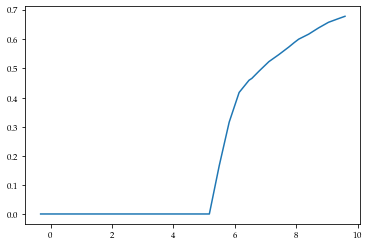

In [671]:
plt.plot(time,frac_heated)
plt.show()

In [58]:
data = read_tracking_data('HotGasTracking')
d = data[(data.sim=='h242')&(data.haloid==439)]
d.keys()

Index(['sim', 'haloid', 'tinfall', 'tquench', 'tau', 'snapnum', 't',
       'gas_coolontime', 'gas_mass', 'i', 'frac_hot', 'frac_disk',
       'frac_stripped', 'frac_stars'],
      dtype='object')

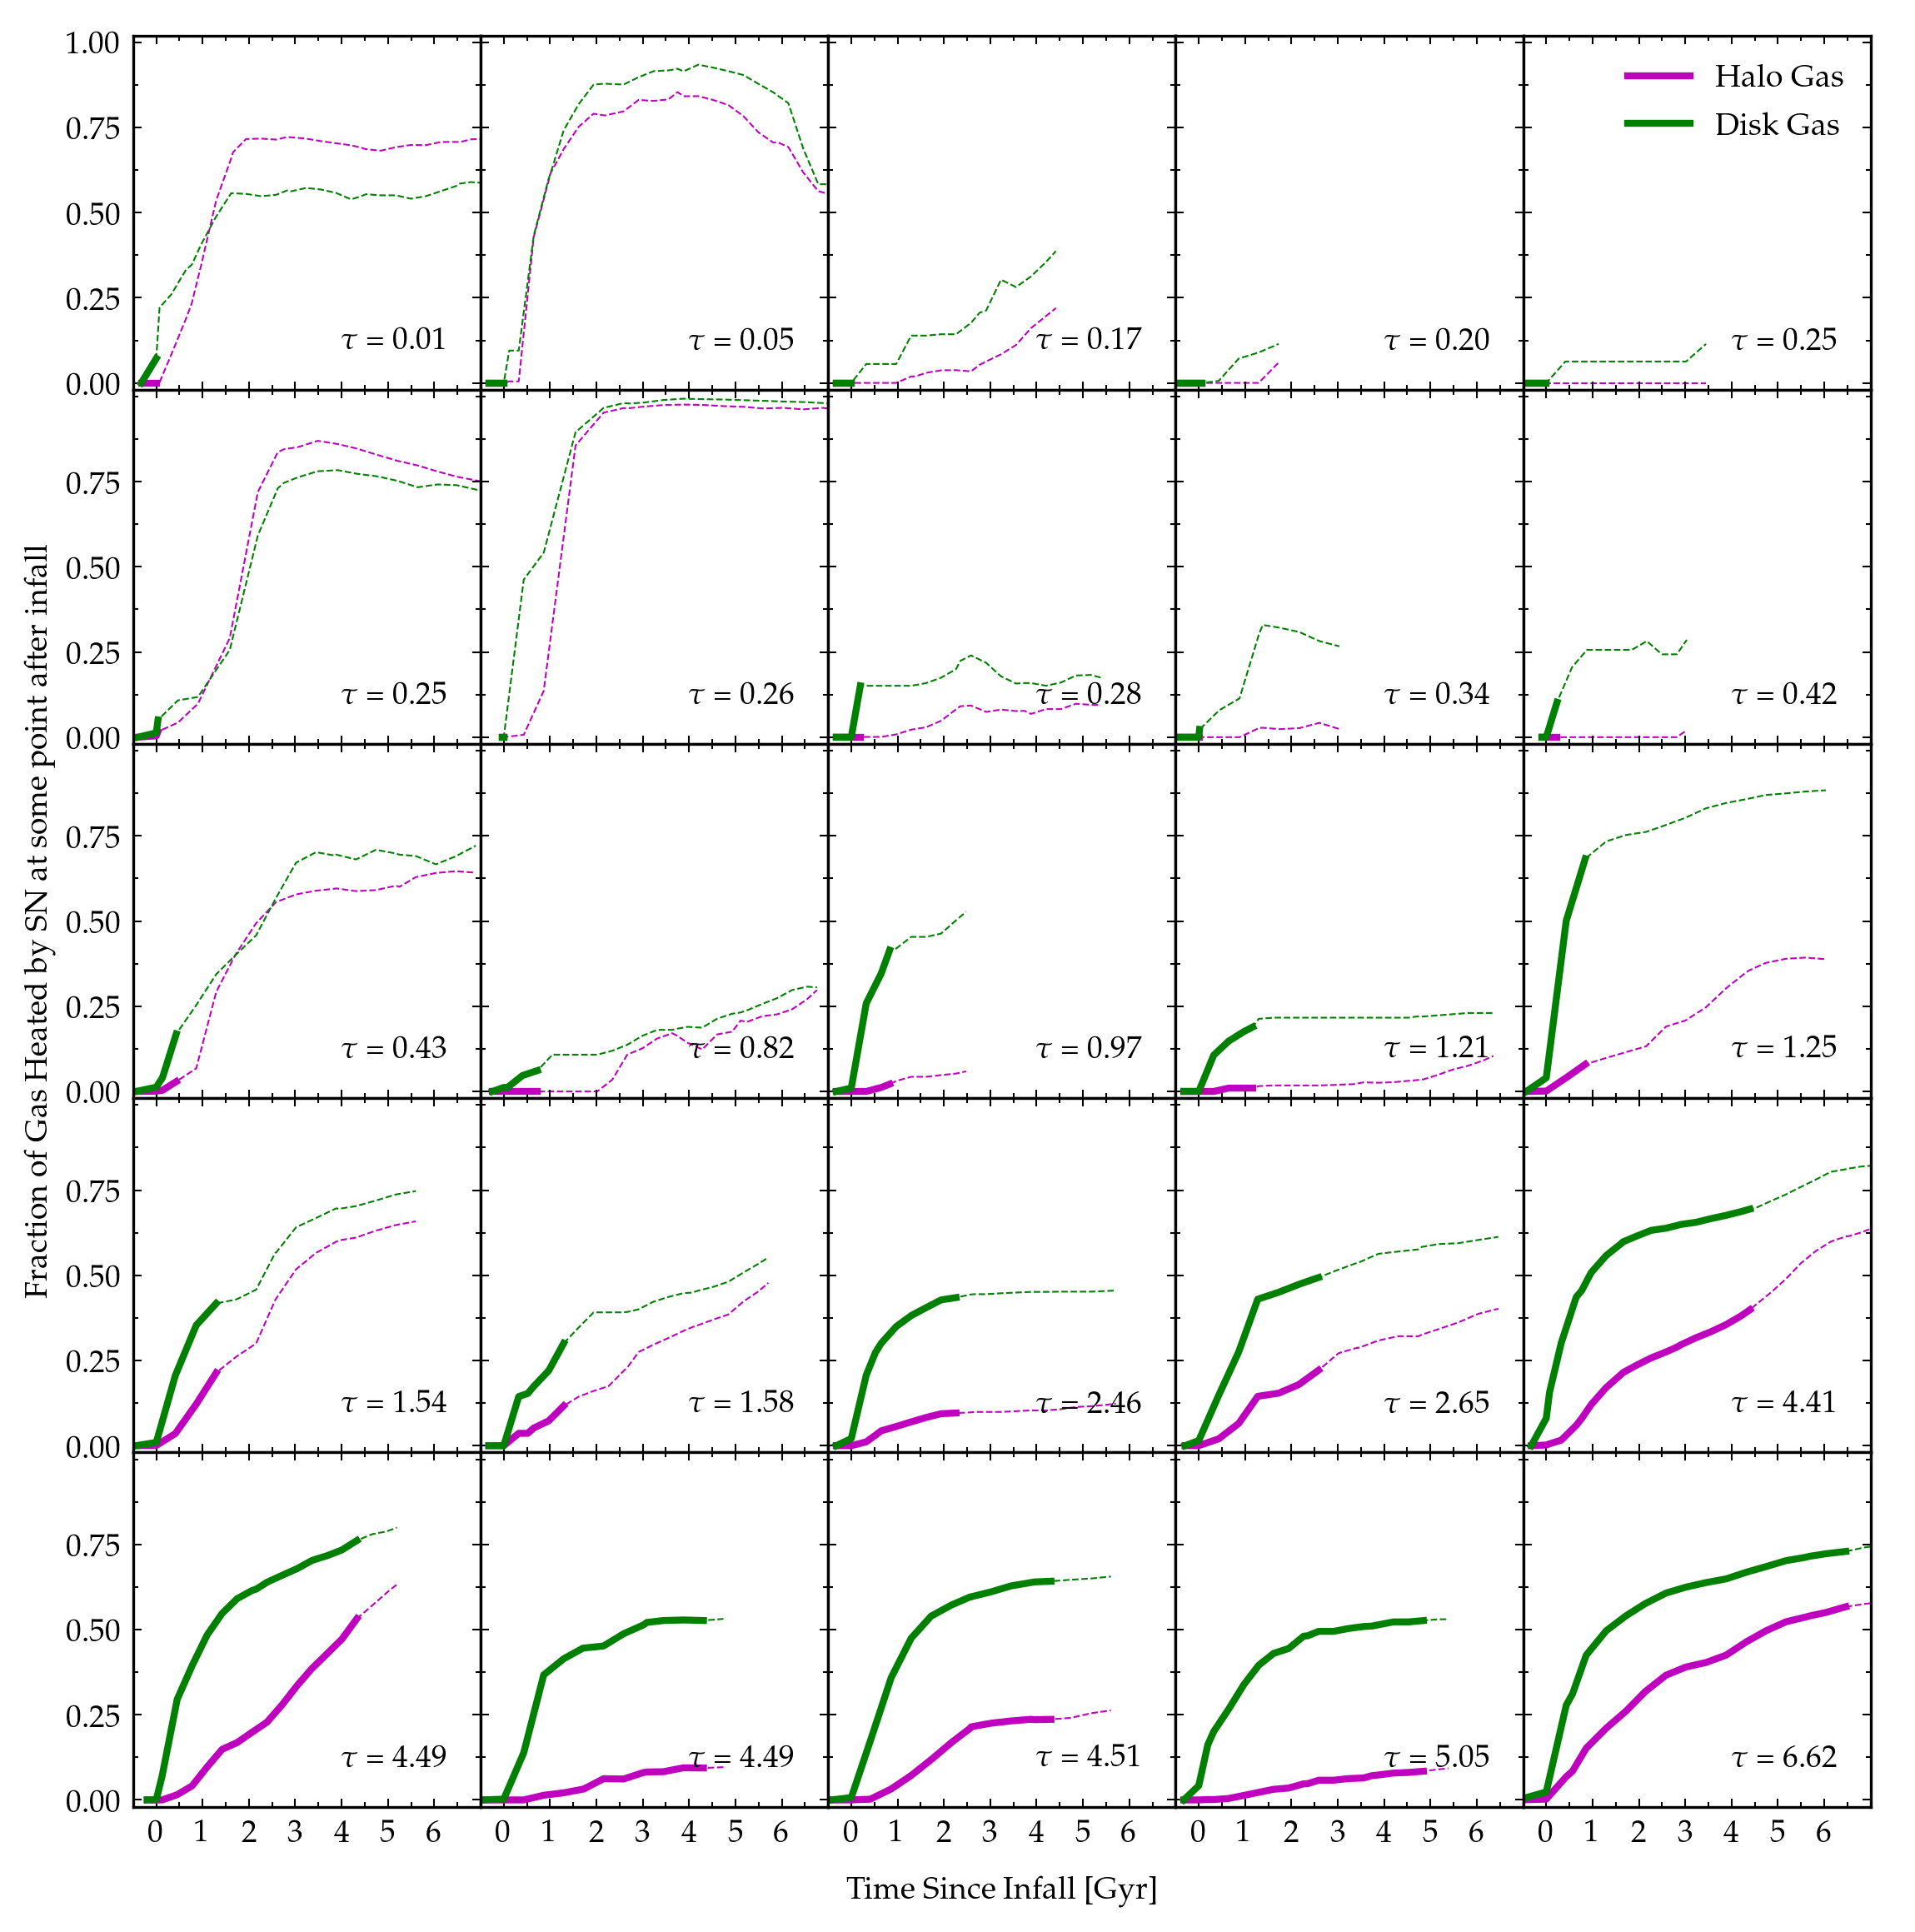

In [57]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

i,j = 0,0
fig, ax = plt.subplots(5,5,dpi=300,figsize=(8,8))
data = read_tracking_data('HotGasTracking')

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        coolontime = np.array(d.gas_coolontime)
        gas_mass = np.array(d.gas_mass)
        
        frac_heated = np.array([])
        for c,t,m in zip(coolontime,time,gas_mass):
            c = np.array(c)
            dif = c-(age-tinfall)
            heated = dif > 0
            f = np.sum(m[heated])/np.sum(m)
            frac_heated = np.append(frac_heated, f)

        ax[i,j].plot(time, frac_heated, 'm--', linewidth=0.5,zorder=1)
        ax[i,j].plot(time[time<tau], frac_heated[time<tau],'m-', linewidth=2,label='Halo Gas',zorder=2)
        
        
        j += 1

i,j = 0,0
data = read_tracking_data('ColdGasTracking')

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        coolontime = np.array(d.gas_coolontime)
    
        frac_heated = np.array([])
        for c,t in zip(coolontime,time):
            c = np.array(c)
            dif = c-(age-tinfall)
            f = len(dif[dif>0])/len(dif)
            frac_heated = np.append(frac_heated, f)

        ax[i,j].plot(time, frac_heated, 'g--', linewidth=0.5,zorder=1)
        ax[i,j].plot(time[time<tau], frac_heated[time<tau],'g-', linewidth=2,label='Disk Gas',zorder=2)
        
        ax[i,j].set_ylim(-0.02,1.02)
        ax[i,j].set_xlim(-0.5,7)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(4, 0.1))
        
        ax[i,j].set_xticks([0,1,2,3,4,5,6])
        ax[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
        
        ax[i,j].set_yticks([0,0.25,0.5,0.75])
        if i==0:
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
        
        ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.125))
        
        ax[i,j].tick_params(direction='in',which='major', width=0.5, length=2.5)
        ax[i,j].tick_params(direction='in',which='minor', width=0.5, length=1.5)
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        
        if (i!=4):
            ax[i,j].set_xticklabels([])
        if (j!=0):
            ax[i,j].set_yticklabels([])
            
        j += 1
    
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel("Fraction of Gas Heated by SN at some point after infall")
plt.xlabel("Time Since Infall [Gyr]")  
ax[0,4].legend(frameon=False)

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

# plt.savefig('Stripped_Fractions.png',dpi=300)
plt.show()

In [9]:
data = read_tracking_data('HotGasTracking')
data.keys()

Index(['sim', 'haloid', 'tinfall', 'tquench', 'tau', 'snapnum', 't',
       'gas_coolontime', 'gas_mass', 'i', 'frac_hot', 'frac_disk',
       'frac_stripped', 'frac_stars', 'h1dist', 'v_r', 'theta', 'v_rel',
       'P_ram', 'P_rest', 'ratio'],
      dtype='object')

In [13]:
v = data.v_rel[0]
np.dot(v,v)

51062.4225

In [89]:
d.theta

91     18.625746
92     21.474174
93     28.896894
94     46.103571
95     21.868046
96     20.902743
97     21.002445
98     25.938970
99     33.982956
100    47.652676
101    50.930564
102    70.147458
103    80.325689
104    55.518360
105    39.822817
Name: theta, dtype: float64

In [ ]:
data = 

# Updating with new data, April 7 2020

New data includes information about angle of infall and radial velocity, and is generated from the most recent tinfall-tquench data which has only 22 (not 25) satellites that quench after infall. 

Index(['sim', 'haloid', 'tinfall', 'tquench', 'tau', 'snapnum', 't',
       'gas_coolontime', 'gas_mass', 'i', 'frac_hot', 'frac_disk',
       'frac_stripped', 'frac_stars', 'h1dist', 'v_r', 'theta', 'v_rel',
       'P_ram', 'P_rest', 'ratio'],
      dtype='object')
233.96333152868206
263.557528065506
337.9095531351548
230.0327741866363
225.09407122356643
236.8093454659254
214.74414194571176
157.52239332869468
139.33820043333415
174.50238422439963
251.07305032599575
172.24560168550022
162.8724608397626
201.19956113272215
217.40214649354314
164.28461705223654
172.0391150291119
160.4833365181569
235.97967730294064
157.2414010367499
169.35421016319611
222.48635059257006


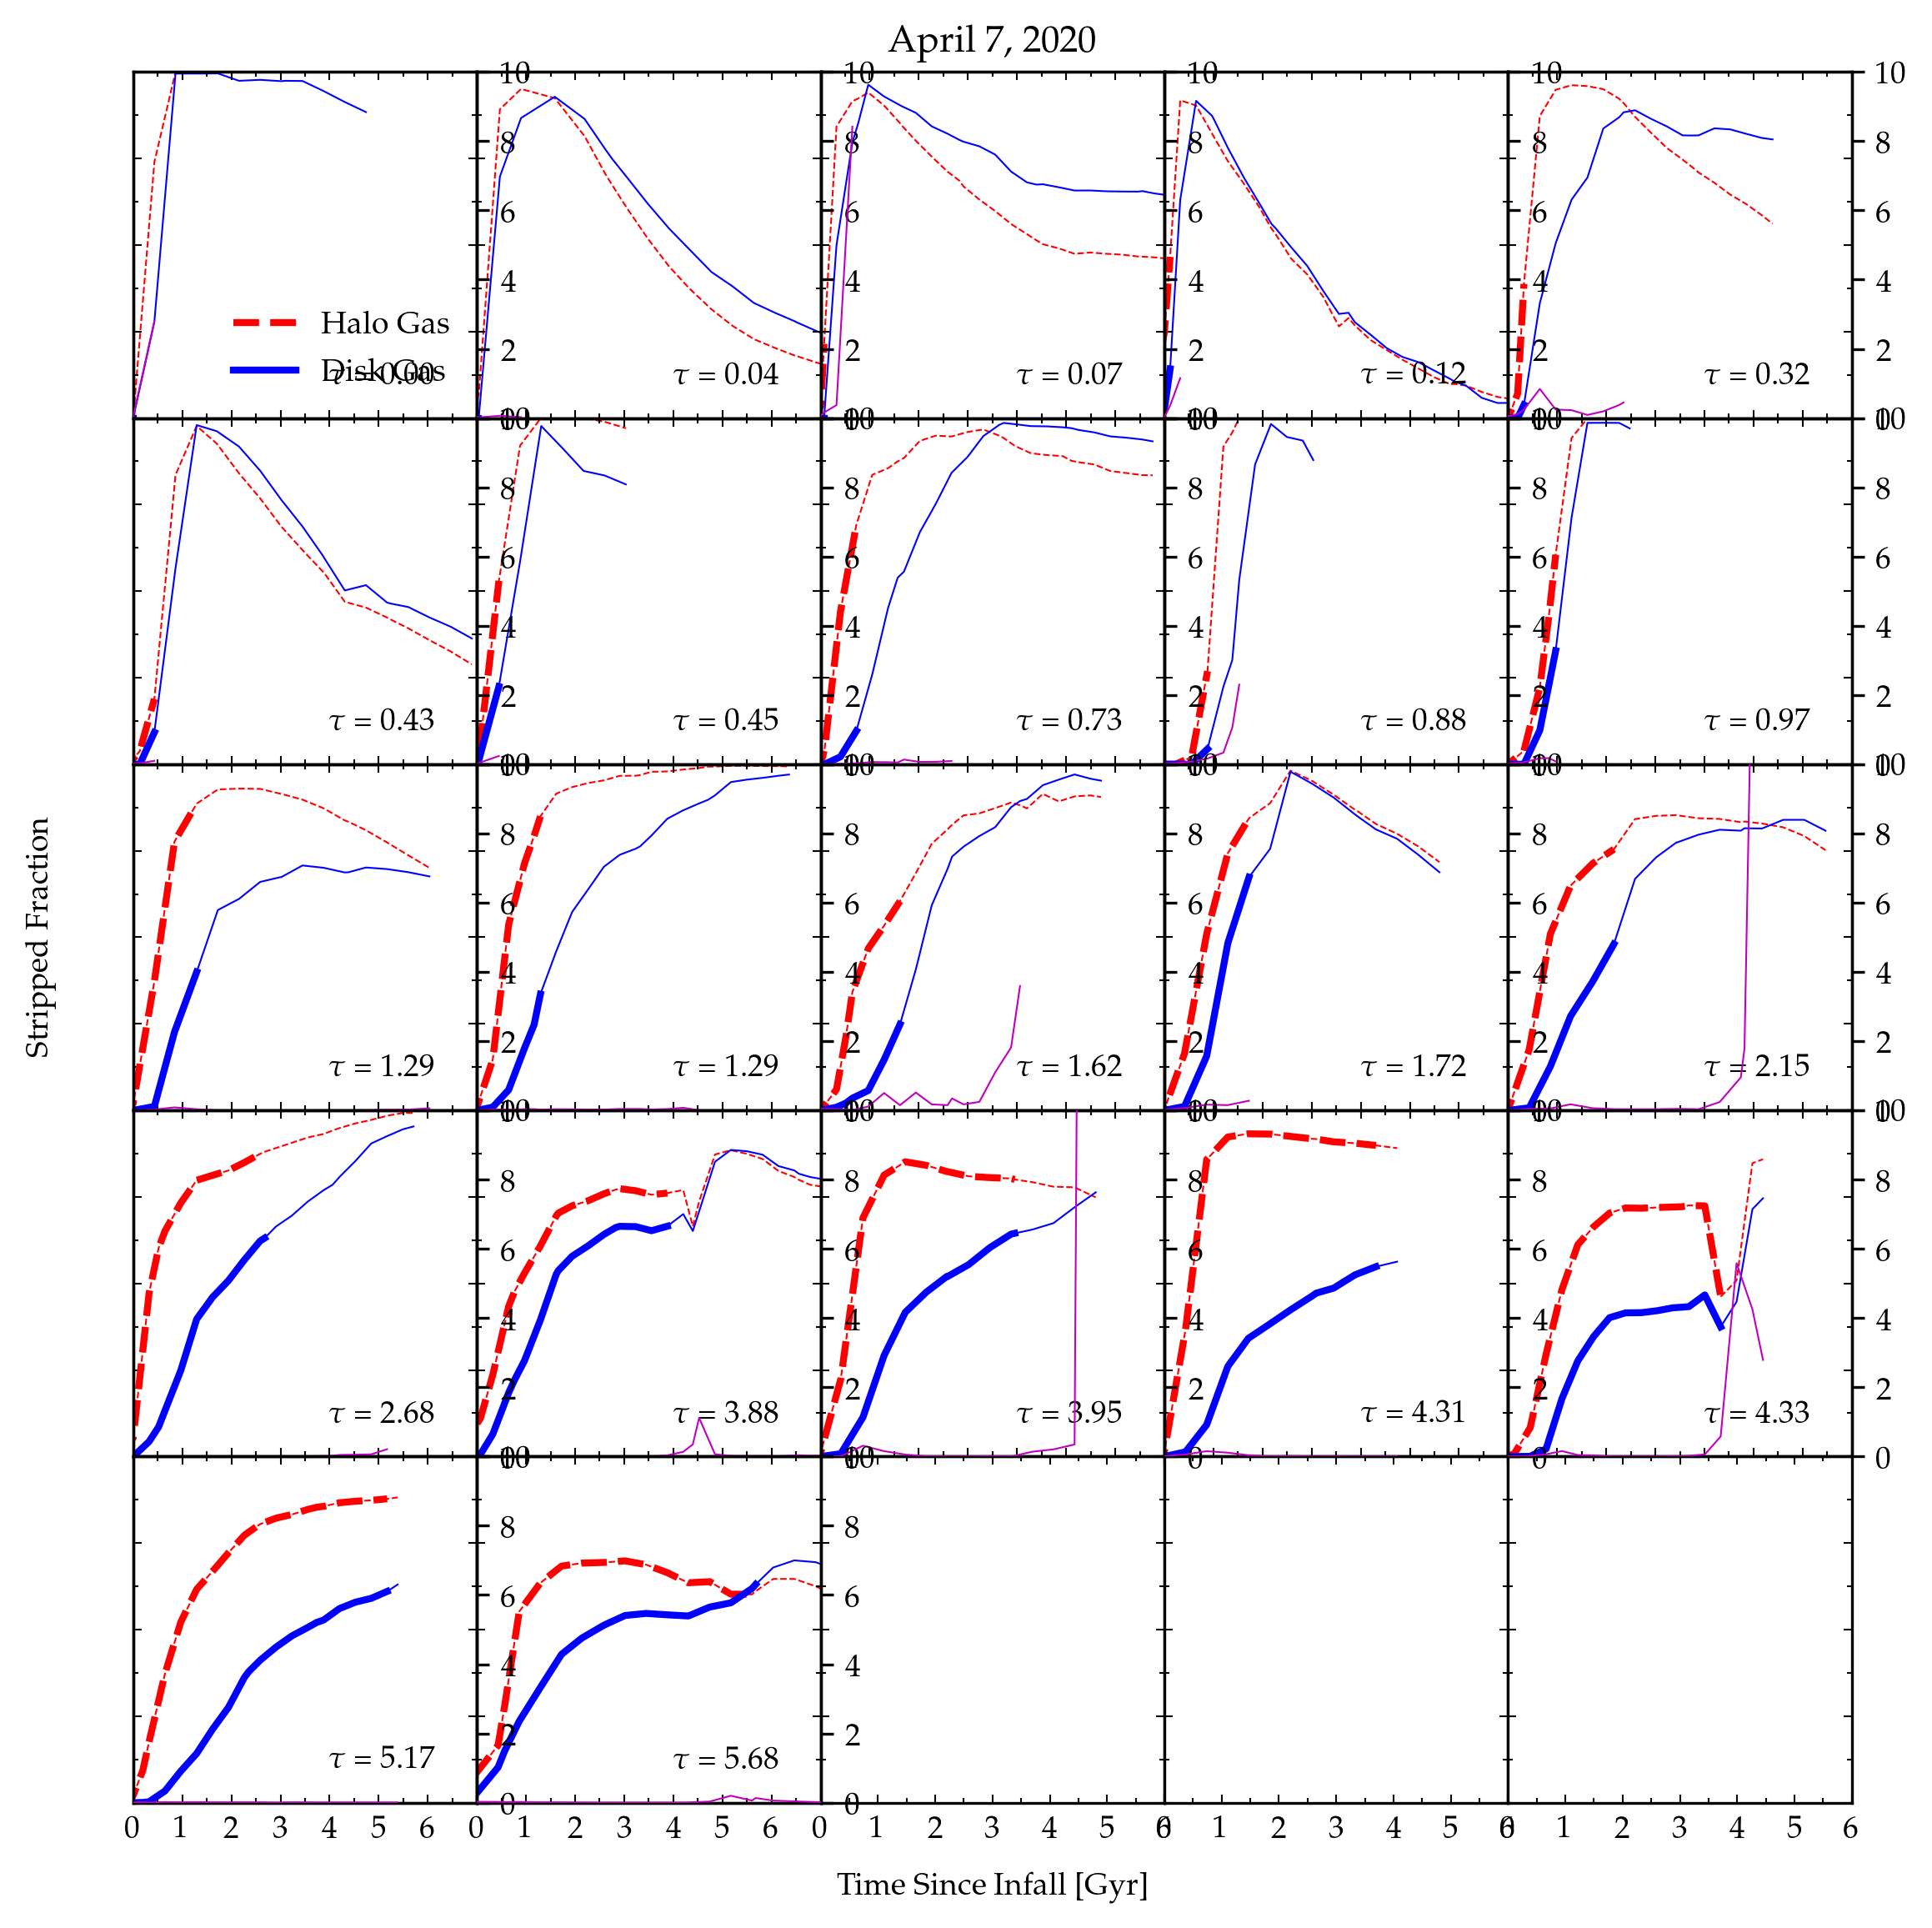

In [21]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

data = read_tracking_data('HotGasTracking')
taus = np.sort(np.unique(data.tau))
sims_sorted, haloids_sorted = np.array([]), np.array([])
for tau in taus:
    sim = data.sim[data.tau==tau].tolist()[0]
    haloid = data.haloid[data.tau==tau].tolist()[0]
    sims_sorted = np.append(sims_sorted,sim)
    haloids_sorted = np.append(haloids_sorted,haloid)


i,j = 0,0
fig, ax = plt.subplots(5,5,dpi=300,figsize=(8,8))
data = read_tracking_data('HotGasTracking')
print(data.keys())

tau_hot, t60_hot,t60_hot_haloid,t60_hot_sim = np.array([]), np.array([]), np.array([]), np.array([])
hot_theta, hot_vr, hot_v, hot_Pram, hot_ratio = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        
        theta = np.array(d.theta)[np.argmin(np.abs(time))]
        vr = np.array(d.v_r)[np.argmin(np.abs(time))]
        v = np.array(d.v_rel)[np.argmin(np.abs(time))]
        v = np.sqrt(np.dot(v,v)) # magnitude of velocity at infall
        print(v)
        
        P_ram = np.array(d.P_ram)[np.argmin(np.abs(time))]
        ratio = np.array(d.ratio)[np.argmin(np.abs(time))]

        ratio_ax = ax[i,j].twinx()
        ratio_overtime =np.array(d.ratio)
        ratio_ax.plot(time, ratio_overtime, 'm-', linewidth=0.5, zorder=3)
        if (j!=4):
            ax[i,j].set_yticklabels([])
        
        ratio_ax.set_ylim(-0,10)
        
        assert len(np.array(d.theta))==len(time)
        
        frac_stripped = np.array(d.frac_stripped)
        
        
        ax[i,j].plot(time, frac_stripped, 'r--', linewidth=0.5, zorder=1)
        ax[i,j].plot(time[time<tau], frac_stripped[time<tau], 'r--', linewidth=2, label='Halo Gas', zorder=2)
        

        
        # frac_stars = np.array(d.frac_stars)        
        # ax[i,j].plot(time, frac_stars, 'm--', linewidth=0.5, zorder=1)
        # ax[i,j].plot(time[time<tau], frac_stars[time<tau], 'm--', linewidth=2, zorder=2)
        
        
        for t, frac in zip(time,frac_stripped):
            if frac > 0.6:
                t60_hot = np.append(t60_hot,t)
                tau_hot = np.append(tau_hot,tau)
                t60_hot_haloid = np.append(t60_hot_haloid,haloid)
                t60_hot_sim = np.append(t60_hot_sim,sim)
                hot_theta = np.append(hot_theta, theta)
                hot_vr = np.append(hot_vr, vr)
                hot_v = np.append(hot_v, v)
                hot_Pram = np.append(hot_Pram, P_ram)
                hot_ratio = np.append(hot_ratio, ratio)
                break

        j += 1

i,j = 0,0
data = read_tracking_data('ColdGasTracking')
tau_cold, t60_cold,t60_cold_haloid,t60_cold_sim = np.array([]), np.array([]),np.array([]), np.array([])

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        tau = tinfall-tquench
        time = np.array(d.t - (age - tinfall))
        
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(time, frac_stripped, 'b-',linewidth=0.5,zorder=1)
        ax[i,j].plot(time[time<tau], frac_stripped[time<tau],'b-', linewidth=2, label='Disk Gas', zorder=2)
        
        ax[i,j].set_ylim(0,1)
        ax[i,j].set_xlim(0,7)
        ax[i,j].annotate(fr'$\tau$ = {tau:.2f}',(4, 0.1))
        
        ax[i,j].set_xticks([0,1,2,3,4,5,6])
        ax[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
        
        ax[i,j].set_yticks([0,0.25,0.5,0.75])
        if i==0:
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            if j==0:
                ax[i,j].legend(frameon=False)
        
        ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.125))
        
        ax[i,j].tick_params(direction='in',which='major', width=0.5, length=2.5)
        ax[i,j].tick_params(direction='in',which='minor', width=0.5, length=1.5)
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        
        if (i!=4):
            ax[i,j].set_xticklabels([])
        if (j!=0):
            ax[i,j].set_yticklabels([])
            
        
        
        for t, frac in zip(time,frac_stripped):
            if frac > 0.6:
                t60_cold = np.append(t60_cold,t)
                t60_cold_haloid = np.append(t60_cold_haloid,haloid)
                t60_cold_sim = np.append(t60_cold_sim,sim)
                tau_cold = np.append(tau_cold,tau)
                break
        
            
        j += 1



for i,j in zip([4,4,4],[2,3,4]):
    ax[i,j].set_xticks([0,1,2,3,4,5,6])
    ax[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))

    ax[i,j].set_yticks([0,0.25,0.5,0.75])
    ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.125))

    ax[i,j].tick_params(direction='in',which='major', width=0.5, length=2.5)
    ax[i,j].tick_params(direction='in',which='minor', width=0.5, length=1.5)
    ax[i,j].yaxis.set_ticks_position('both')
    ax[i,j].xaxis.set_ticks_position('both')

    if (j!=0):
        ax[i,j].set_yticklabels([])    
    
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel("Stripped Fraction")
plt.xlabel("Time Since Infall [Gyr]")    
plt.title("April 7, 2020")

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

# plt.savefig('Stripped_Fractions.png',dpi=300)
plt.show()




In [15]:
cold_theta = np.array([hot_theta[i] for i in range(len(hot_theta)) if t60_hot_haloid[i] in t60_cold_haloid])
cold_vr = np.array([hot_vr[i] for i in range(len(hot_vr)) if t60_hot_haloid[i] in t60_cold_haloid])
cold_v = np.array([hot_v[i] for i in range(len(hot_v)) if t60_hot_haloid[i] in t60_cold_haloid])
cold_Pram = np.array([hot_Pram[i] for i in range(len(hot_Pram)) if t60_hot_haloid[i] in t60_cold_haloid])
cold_ratio = np.array([hot_ratio[i] for i in range(len(hot_ratio)) if t60_hot_haloid[i] in t60_cold_haloid])
print(cold_v)

[233.96333153 263.55752807 337.90955314 230.03277419 225.09407122
 236.80934547 214.74414195 157.52239333 139.33820043 174.50238422
 251.07305033 172.24560169 162.87246084 201.19956113 217.40214649
 164.28461705 172.03911503 160.48333652 157.24140104 169.35421016
 222.48635059]


In [16]:
h148_syst_err = 0.31722272420473
other_syst_err = 0.22216906137112474
    
data = read_timescales()

tau_cold_upper_err,tau_cold_lower_err,tau_cold_syst_err = np.array([]),np.array([]), np.array([])
for haloid, sim in zip(t60_cold_haloid,t60_cold_sim):
    d = data[(data.haloid==haloid)&(data.sim==sim)]
    tquench_lower = d.tquench_lower.tolist()[0]
    tquench_upper = d.tquench_upper.tolist()[0]
    tquench = d.tquench.tolist()[0]
    tinfall_lower = d.tinfall_lower.tolist()[0]
    tinfall_upper = d.tinfall_upper.tolist()[0]
    tinfall = d.tinfall.tolist()[0]
    
    if sim=='h148':
        syst_err = h148_syst_err
    else:
        syst_err = other_syst_err
    
    # intentionally switched, a weirdness that comes from using LBT vs regular time
    tq_lower_err = np.sqrt(np.abs(tquench-tquench_upper)**2 + syst_err**2)
    tq_upper_err = np.sqrt(np.abs(tquench-tquench_lower)**2 + syst_err**2)
    ti_lower_err = np.sqrt(np.abs(tinfall-tinfall_upper)**2 + syst_err**2)
    ti_upper_err = np.sqrt(np.abs(tinfall-tinfall_lower)**2 + syst_err**2)
    
    tau_upper_err = np.sqrt(tq_upper_err**2 + ti_upper_err**2 + 2*syst_err**2)
    tau_lower_err = np.sqrt(tq_lower_err**2 + ti_lower_err**2 + 2*syst_err**2)
    tau_cold_upper_err = np.append(tau_cold_upper_err, tau_upper_err)
    tau_cold_lower_err = np.append(tau_cold_lower_err, tau_lower_err)
    tau_cold_syst_err = np.append(tau_cold_syst_err,syst_err)
    

tau_hot_upper_err,tau_hot_lower_err,tau_hot_syst_err = np.array([]),np.array([]), np.array([])
for haloid, sim in zip(t60_hot_haloid,t60_hot_sim):
    d = data[(data.haloid==haloid)&(data.sim==sim)]
    tquench_lower = d.tquench_lower.tolist()[0]
    tquench_upper = d.tquench_upper.tolist()[0]
    tquench = d.tquench.tolist()[0]
    tinfall_lower = d.tinfall_lower.tolist()[0]
    tinfall_upper = d.tinfall_upper.tolist()[0]
    tinfall = d.tinfall.tolist()[0]
    
    if sim=='h148':
        syst_err = h148_syst_err
    else:
        syst_err = other_syst_err
    
    # intentionally switched, a weirdness that comes from using LBT vs regular time
    tq_lower_err = np.sqrt(np.abs(tquench-tquench_upper)**2 + syst_err**2)
    tq_upper_err = np.sqrt(np.abs(tquench-tquench_lower)**2 + syst_err**2)
    ti_lower_err = np.sqrt(np.abs(tinfall-tinfall_upper)**2 + syst_err**2)
    ti_upper_err = np.sqrt(np.abs(tinfall-tinfall_lower)**2 + syst_err**2)
    
    tau_upper_err = np.sqrt(tq_upper_err**2 + ti_upper_err**2 + 2*syst_err**2)
    tau_lower_err = np.sqrt(tq_lower_err**2 + ti_lower_err**2 + 2*syst_err**2)
    tau_hot_upper_err = np.append(tau_hot_upper_err, tau_upper_err)
    tau_hot_lower_err = np.append(tau_hot_lower_err, tau_lower_err)
    tau_hot_syst_err = np.append(tau_hot_syst_err,syst_err)

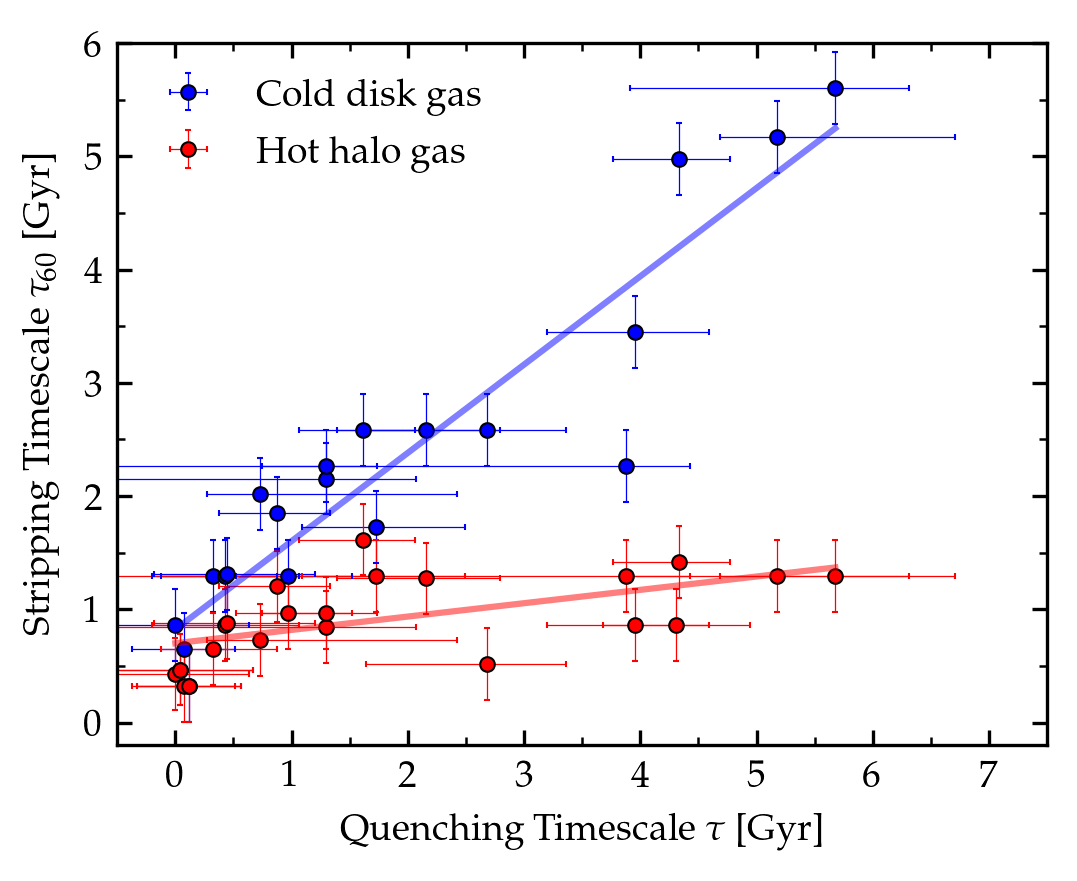

In [18]:
xmin, xmax = -0.5, 7.5
ymin, ymax = -0.2, 6

yscale = (ymax-ymin)*4/(xmax-xmin)

fig, ax = plt.subplots(figsize=(4,yscale),dpi=300)

# ax.scatter(tau_hot, t60_hot, c='r', s=15, label='Hot halo gas',zorder=10, edgecolor='k', linewidths=0.3)
# ax.scatter(tau_cold, t60_cold, c='b', s=15, label='Cold disk gas',zorder=10, edgecolor='k', linewidths=0.3)

ax.errorbar(tau_cold,t60_cold, 
            xerr = [tau_cold_lower_err, tau_cold_upper_err],
            yerr=syst_err,
            fmt='.',
            ms=7,
            elinewidth=0.3,
            capsize=0.8,
            capthick=0.3,
            mec='k',
            mew=0.5,
            c='b', label='Cold disk gas', zorder=1)

ax.errorbar(tau_hot,t60_hot, 
            xerr = [tau_hot_lower_err, tau_hot_upper_err],
            yerr=syst_err,
            fmt='.',
            ms=7,
            elinewidth=0.3,
            capsize=0.8,
            capthick=0.3,
            mec='k',
            mew=0.5,
            c='r', label='Hot halo gas', zorder=1)

# linear fit for the hot gas data
m,b = np.polyfit(tau_hot, t60_hot, 1)
ax.plot(tau_hot, tau_hot*m+b, 'r-',alpha=0.5)

# linear fit for the cold gas data
m,b = np.polyfit(tau_cold, t60_cold, 1)
ax.plot(tau_cold, tau_cold*m+b, 'b-',alpha=0.5)


ax.set_xlabel(r'Quenching Timescale $\tau$ [Gyr]')
ax.set_ylabel(r'Stripping Timescale $\tau_{60}$ [Gyr]')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

ax.legend(frameon=False)
# plt.savefig('stripping_timescale.png', dpi=300)
plt.show()

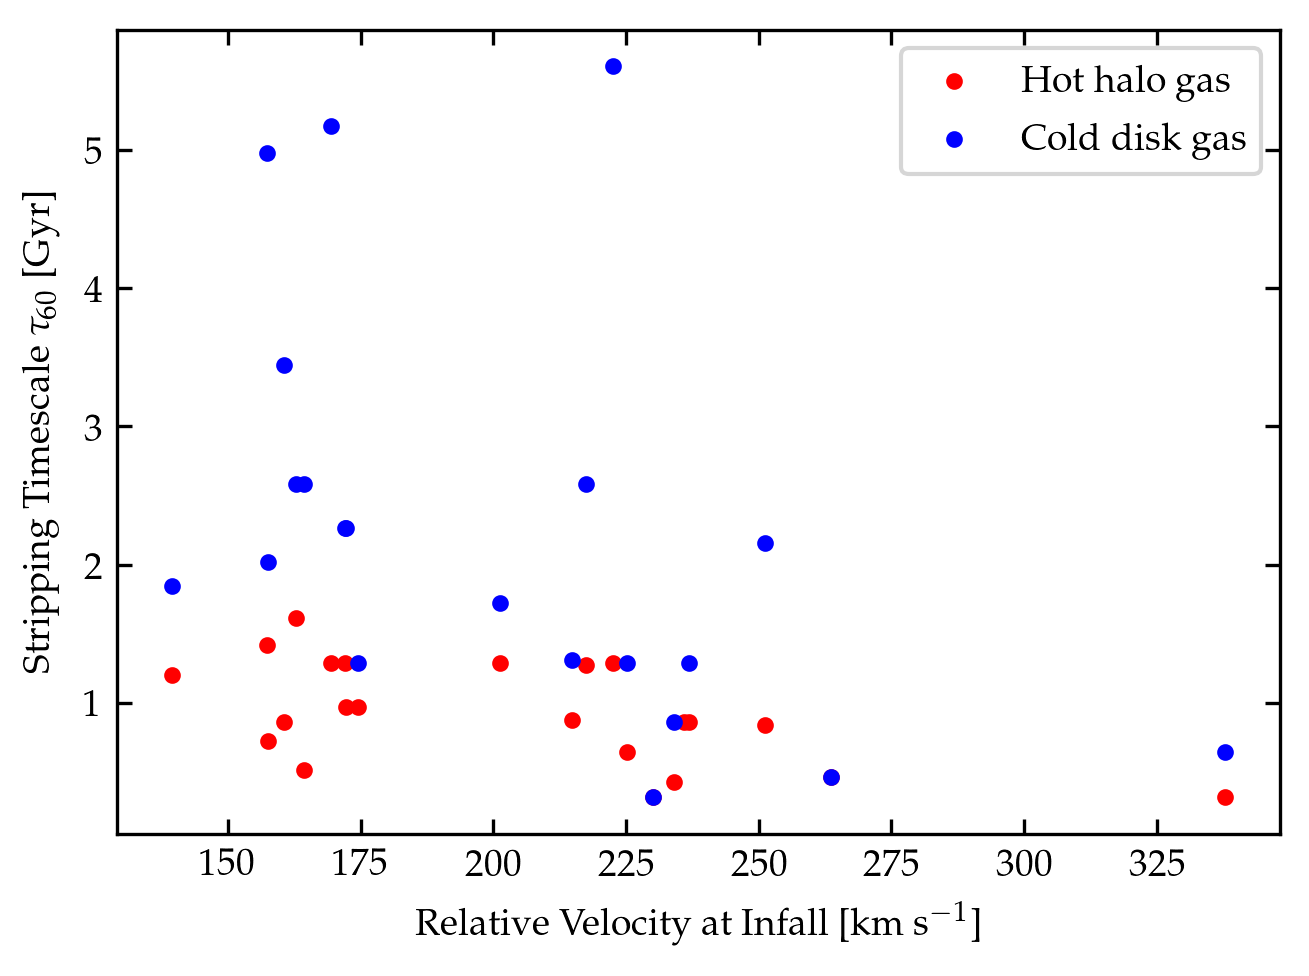

In [17]:



fig, ax = plt.subplots(figsize=(5,3.55),dpi=300)

# ax.scatter(tau_hot, t60_hot, c='r', s=15, label='Hot halo gas',zorder=10, edgecolor='k', linewidths=0.3)
# ax.scatter(tau_cold, t60_cold, c='b', s=15, label='Cold disk gas',zorder=10, edgecolor='k', linewidths=0.3)

ax.scatter(hot_v, t60_hot, c='r', marker='.', label='Hot halo gas')
ax.scatter(cold_v, t60_cold, c='b',marker='.',label='Cold disk gas')


# # linear fit for the hot gas data
# m,b = np.polyfit(tau_hot, t60_hot, 1)
# ax.plot(tau_hot, tau_hot*m+b, 'r-',alpha=0.5)

# # linear fit for the cold gas data
# m,b = np.polyfit(tau_cold, t60_cold, 1)
# ax.plot(tau_cold, tau_cold*m+b, 'b-',alpha=0.5)


ax.set_xlabel(r'Relative Velocity at Infall [km s$^{-1}$]')
ax.set_ylabel(r'Stripping Timescale $\tau_{60}$ [Gyr]')

ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# ax.semilogx()

ax.legend()
# plt.savefig('stripping_timescale.png', dpi=300)
plt.show()

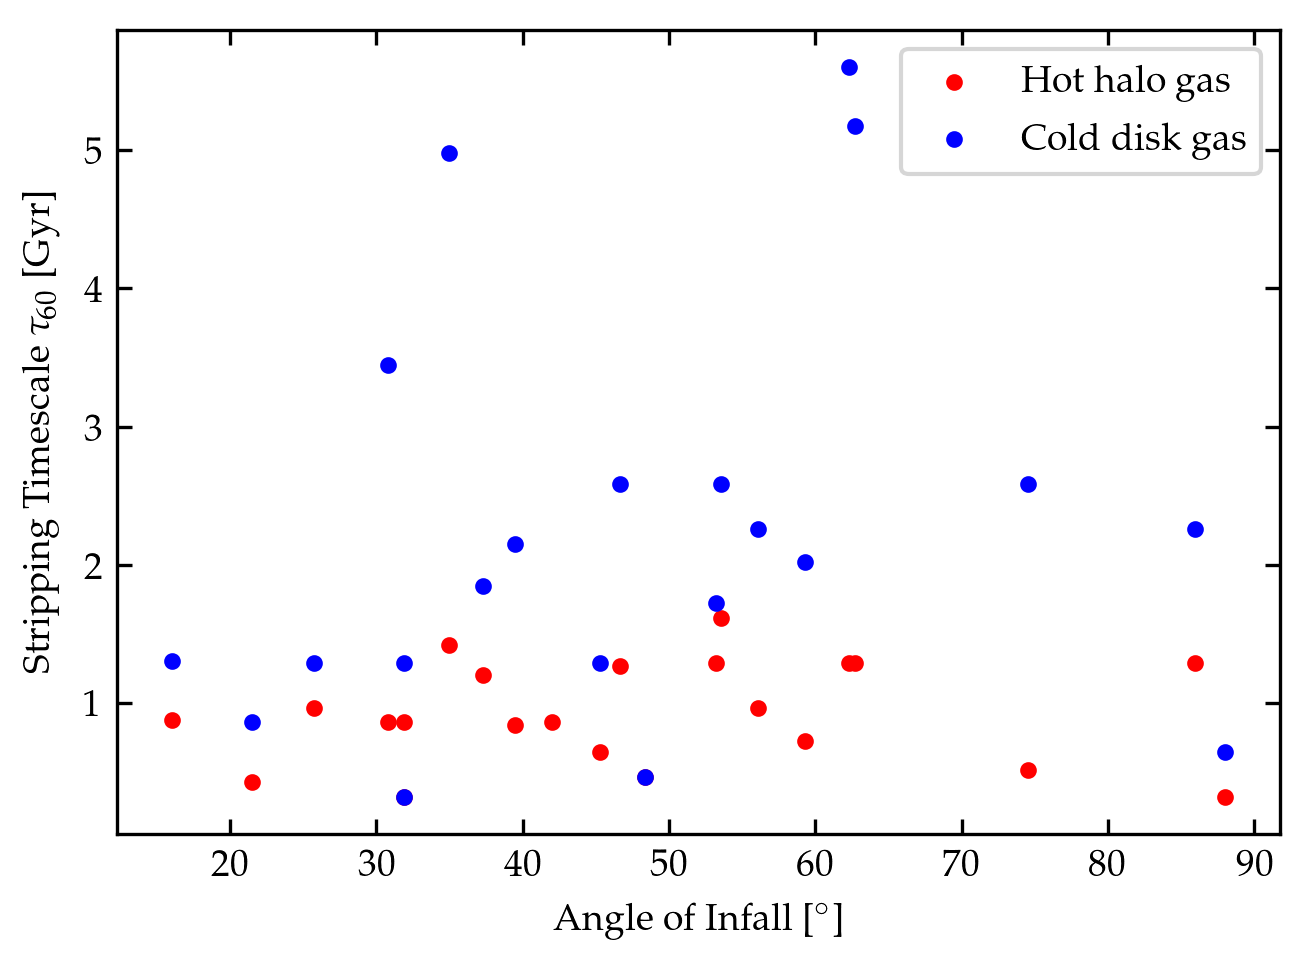

In [140]:



fig, ax = plt.subplots(figsize=(5,3.55),dpi=300)

# ax.scatter(tau_hot, t60_hot, c='r', s=15, label='Hot halo gas',zorder=10, edgecolor='k', linewidths=0.3)
# ax.scatter(tau_cold, t60_cold, c='b', s=15, label='Cold disk gas',zorder=10, edgecolor='k', linewidths=0.3)

ax.scatter(hot_theta, t60_hot, c='r', marker='.', label='Hot halo gas')
ax.scatter(cold_theta, t60_cold, c='b',marker='.',label='Cold disk gas')


# # linear fit for the hot gas data
# m,b = np.polyfit(tau_hot, t60_hot, 1)
# ax.plot(tau_hot, tau_hot*m+b, 'r-',alpha=0.5)

# # linear fit for the cold gas data
# m,b = np.polyfit(tau_cold, t60_cold, 1)
# ax.plot(tau_cold, tau_cold*m+b, 'b-',alpha=0.5)


ax.set_xlabel(r'Angle of Infall [$^\circ$]')
ax.set_ylabel(r'Stripping Timescale $\tau_{60}$ [Gyr]')

ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.legend()
# plt.savefig('stripping_timescale.png', dpi=300)
plt.show()

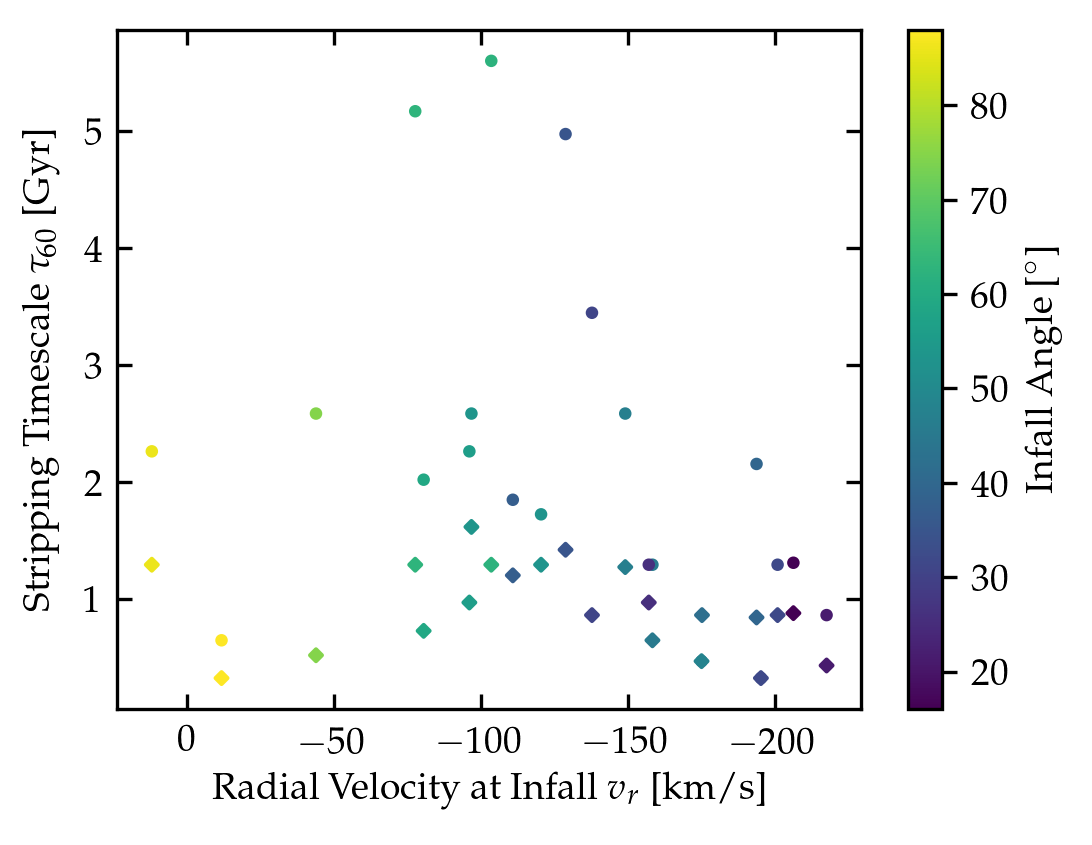

In [132]:



fig, ax = plt.subplots(figsize=(4,3),dpi=300)

# ax.scatter(tau_hot, t60_hot, c='r', s=15, label='Hot halo gas',zorder=10, edgecolor='k', linewidths=0.3)
# ax.scatter(tau_cold, t60_cold, c='b', s=15, label='Cold disk gas',zorder=10, edgecolor='k', linewidths=0.3)


im = ax.scatter(hot_vr, t60_hot, marker='D',s=4, label='Hot halo gas', c=hot_theta)
ax.scatter(cold_vr, t60_cold,marker='o',s=4,label='Cold disk gas', c=cold_theta)

cbar = plt.colorbar(im, ax = ax) 
cbar.ax.set_ylabel(r'Infall Angle [$^\circ$]')


# # linear fit for the hot gas data
# m,b = np.polyfit(tau_hot, t60_hot, 1)
# ax.plot(tau_hot, tau_hot*m+b, 'r-',alpha=0.5)

# # linear fit for the cold gas data
# m,b = np.polyfit(tau_cold, t60_cold, 1)
# ax.plot(tau_cold, tau_cold*m+b, 'b-',alpha=0.5)


ax.set_xlabel(r'Radial Velocity at Infall $v_r$ [km/s]')
ax.set_ylabel(r'Stripping Timescale $\tau_{60}$ [Gyr]')


ax.invert_xaxis()
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

# ax.legend(frameon=False)
# plt.savefig('stripping_timescale.png', dpi=300)
plt.show()

I have the $\theta$ and $v_r$ data available at all the snapshots that I have particletracking data for, not just at infall. What are some ways I could utilize that?